In [2]:
libraries = c("dplyr", "magrittr", "tidyr", "ggplot2", "readxl", "cmdstanr", "posterior", "bayesplot", "lubridate", "glue")  
for(x in libraries) { library(x, character.only=TRUE, warn.conflicts=FALSE, quietly=TRUE) |> suppressMessages() }

set_cmdstan_path('../../../../CmdStan') |> suppressMessages()
Sys.setlocale("LC_TIME", "C")

R.Version()$version.string

[1] "C"

[1] "R version 4.1.0 (2021-05-18)"

# Data for 2020

In [4]:
# here we use the linelist of local cases confirmed in 2020
# the source is the publicly available reports from Taiwan CDC https://www.cdc.gov.tw/
df_twn2020 = read.csv("../../data/data_Taiwan_Local_2020.csv", na=c("NA","")) |>
    mutate(across(c("Onset", "Confirm"), as.Date))

(nrow(df_twn2020))
df_twn2020

[1] 54

ID,Gender,Nationality,ExposureDetail,Onset,Confirm
<int>,<chr>,<chr>,<chr>,<date>,<date>
8,M,Taiwan,Household,2020-01-26,2020-01-28
9,F,Taiwan,Household,2020-01-27,2020-01-30
19,M,Taiwan,Contact with a case,2020-01-27,2020-02-16
20,M,Taiwan,Household,NA,2020-02-16
21,F,Taiwan,Household,2020-02-06,2020-02-18
22,M,Taiwan,Household,2020-01-28,2020-02-18
23,F,Taiwan,Household,2020-02-03,2020-02-19
24,F,Taiwan,NA,2020-01-22,2020-02-20
25,F,Taiwan,Household,2020-01-28,2020-02-21


In [5]:
#number of symptomatic cases 
(nrow(df_twn2020 %>% filter(!is.na(Onset))))

[1] 48

In [6]:
# one case was confirmed before symptoms onset
df_twn2020 %>% filter(Onset > Confirm)

ID,Gender,Nationality,ExposureDetail,Onset,Confirm
<int>,<chr>,<chr>,<chr>,<date>,<date>
41,F,Taiwan,Household,2020-03-03,2020-03-02


# Data for 2021

In [7]:
datafilename = "../../data/data.xlsx"
read_excel(datafilename, na=c("NA","")) %>%
    select(ID, Onset, PositiveTest, Confirmation) %>%
    mutate(across(c("Onset", "PositiveTest", "Confirmation"), as.Date)) %>%
    rename(Confirm=Confirmation) -> df_outbreak2021
(nrow(df_outbreak2021))
df_outbreak2021 %>% tail

[1] 22

ID,Onset,PositiveTest,Confirm
<chr>,<date>,<date>,<date>
B4.4,2021-01-28,2021-01-29,2021-01-30
E1,NA,2021-01-29,2021-01-30
B4.5,2021-01-29,2021-01-29,2021-01-30
B4.6,2021-01-29,2021-01-29,2021-01-30
B1.4,2021-02-01,2021-02-04,2021-02-05
B4.7,2021-02-07,2021-02-08,2021-02-09


In [8]:
#number of symptomatic cases 
(nrow(df_outbreak2021 %>% filter(!is.na(Onset))))

[1] 20

Warning message:
“Removed 2 rows containing non-finite values (stat_count).”


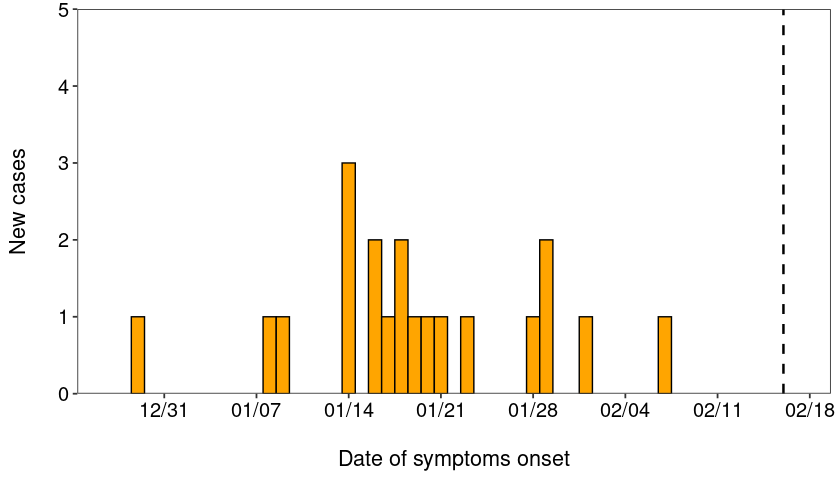

In [9]:
options(repr.plot.width=7, repr.plot.height=4)
datemax = as.Date("2021-02-16")
ymx = 5

df_outbreak2021 %>%
    ggplot(aes(Onset)) +
        geom_bar(color="black", size=.4, width=1, fill="orange") +
        labs(x="\nDate of symptoms onset", y="New cases\n") +
        theme_bw() + 
        geom_vline(xintercept=datemax, linetype="dashed", color = "black", size = 0.7) + 
        scale_x_date(date_labels="%m/%d",date_breaks  = "7 days", limit=c(min(df_outbreak2021$Onset, na.rm=T)-2,datemax+1)) +
        scale_y_continuous(limit=c(0,ymx), expand = c(0, 0)) +
        theme(text = element_text(size=13, family="sans", color="black"),
            axis.text = element_text(size=12, family="sans", color="black"),
            panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
            legend.position = "none")

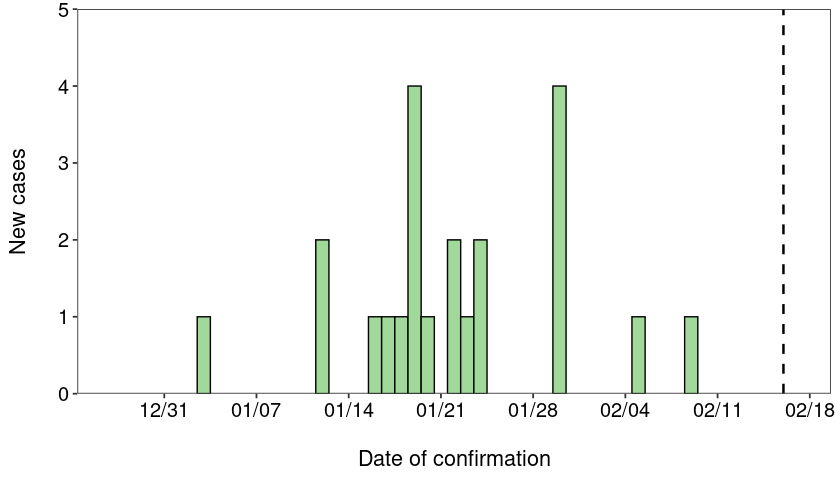

In [10]:
df_outbreak2021 %>% 
  ggplot(aes(Confirm)) +
    geom_bar(color="black", size=.4, width=1, fill="#a1d99b") +
    labs(x="\nDate of confirmation", y="New cases\n") +
    theme_bw() + 
    geom_vline(xintercept=datemax, linetype="dashed", color = "black", size = 0.7) + 
    scale_x_date(date_labels="%m/%d",date_breaks  = "7 days", limit=c(min(df_outbreak2021$Onset, na.rm=T)-2,datemax+1)) +
    scale_y_continuous(limit=c(0,ymx), expand = c(0, 0)) +
    theme(text = element_text(size=13, family="sans", color="black"),
      axis.text = element_text(size=12, family="sans", color="black"),
      panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
      legend.position = "none")

# Localized end-of-outbreak

In [11]:
# setting the time zero
(mindate_end_of_outbreak = min(df_outbreak2021$Onset,na.rm=T) - 5) 

[1] "2020-12-24"

In [12]:
# creating a data frame with case counts per day
df_outbreak2021 %>%
    group_by(Onset) %>% summarize(cases=n()) %>% drop_na %>%
    mutate(day = as.numeric(Onset-mindate_end_of_outbreak)) %>% select(-Onset) -> df_epicurve
df_epicurve %>% t

cases,1,1,1,3,2,1,2,1,1,1,1,1,2,1,1
day,5,15,16,21,23,24,25,26,27,28,30,35,36,39,45


In [13]:
# filling missing days with zero counts
df_epicurve %<>%
    right_join(expand_grid(day = 0:(max(df_epicurve$day)+45)), by='day') %>% replace_na(list(cases=0)) %>%
    select(day, cases) %>%
    arrange(day)
df_epicurve %>% t

day,0,1,2,3,4,5,6,7,8,9,⋯,81,82,83,84,85,86,87,88,89,90
cases,0,0,0,0,0,1,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


In [14]:
# similar data frame but by date of confirmation rather than by date of symptoms onset
df_outbreak2021 %>%
    group_by(Confirm) %>% summarize(cases=n()) %>%
    mutate(day = as.numeric(Confirm-mindate_end_of_outbreak)) %>% select(-Confirm) %>%
    # extending the date for predicting the end of outbreak probability
    right_join(expand_grid(day = 0:(max(df_epicurve$day)+45)), by="day") %>% replace_na(list(cases=0)) %>%
    select(day, cases) %>%
    arrange(day) -> df_epicurve_confirmation
df_epicurve_confirmation %>% t

day,0,1,2,3,4,5,6,7,8,9,⋯,126,127,128,129,130,131,132,133,134,135
cases,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


# Stan programs

First, we will test the program with fixed $R$ and $k$, and then we will combine both the estimation of $R$ and $k$ and probability of ending the outbreak. Please see the second part for the latter (the results of those simulation will be reported in the paper)

In [36]:
# We will need to determine the delay distribution
mindate = as.Date('2020-01-01')
# We also account for right truncation, because the analysis was done in March-April 2021
# So we assume the right truncation at April 12, 2021
publication_day = as.numeric(as.Date("2021-04-12") - mindate)

rbind(select(df_twn2020, Onset, Confirm), select(df_outbreak2021, Onset, Confirm)) %>%
    mutate(onset_day = ifelse(!is.na(Onset), as.numeric(Onset - mindate), NA), confirmation_day = as.numeric(Confirm - mindate)) -> df_delay_all

#number of symptomatic cases 
(nrow(df_delay_all %>% filter(!is.na(Onset))))

df_delay_all %>% head

[1] 68

,Onset,Confirm,onset_day,confirmation_day
,<date>,<date>,<dbl>,<dbl>
1,2020-01-26,2020-01-28,25,27
2,2020-01-27,2020-01-30,26,29
3,2020-01-27,2020-02-16,26,46
4,NA,2020-02-16,NA,46
5,2020-02-06,2020-02-18,36,48
6,2020-01-28,2020-02-18,27,48


In [42]:
# Reporting delay destribution is shifted Gamma
stan_code = "functions {    
    real positive_half_normal_rng(real mu, real sigma) {
      real y = -1;
      while (y < 0)
        y = normal_rng(mu, sigma);
      return y;
    }

    /* ODE for calculating the convolution f(s-tau)*h(tau) */
    vector conv_ode(real tau, vector y, real param1_SI, real param2_SI, real shift, real param1_delay, real param2_delay, int comp, real s) { 
        vector[1] dydt;
        // convolution of Weibull distribution with gamma
        if (comp==1)
            dydt[1] = exp(weibull_lpdf(s - tau | param1_SI, param2_SI) + gamma_lpdf(tau + shift | param1_delay, param2_delay));
        else if (comp==2)
            dydt[1] = exp(weibull_lpdf(s - tau | param1_SI, param2_SI) + weibull_lpdf(tau + shift | param1_delay, param2_delay));
        else
            dydt[1] = exp(weibull_lpdf(s - tau | param1_SI, param2_SI) + lognormal_lpdf(tau + shift | param1_delay, param2_delay));
        return dydt;
    }

    /* to calculate the convolution: integral(f(s-tau)*h(tau), tau=-shift..s) */
    vector conv_pdf(real s, vector y, real param1_SI, real param2_SI, real shift, real param1_delay, real param2_delay, int comp) {
        return(ode_rk45(conv_ode, rep_vector(0.0, 1), -shift, rep_array(s, 1), param1_SI, param2_SI, shift, param1_delay, param2_delay, comp, s)[1,]);
    }

    /* to calculate the cdf of the convolution: integral(integral(f(s-tau)*h(tau), tau=-shift..s), s = -shift..t) */
    real conv_cdf(real t, real param1_SI, real param2_SI, real shift, real param1_delay, real param2_delay, int comp) {
        return(ode_rk45(conv_pdf, rep_vector(0.0, 1), -shift + 1e-8, rep_array(t, 1), param1_SI, param2_SI, shift, param1_delay, param2_delay, comp)[1,1]);
    }
}

data {
    /* For reporting delay */
    int<lower = 1> N; // number of records
    int<lower = 0> onset_day[N];
    int<lower = 0> confirmation_day[N];

    int<lower = max(confirmation_day)> publication_time;

    /* For end of outbreak */
    int<lower = 1> D; // number days in the epicurve
    int day[D]; // vector of days in the epicurve
    int<lower = 0> cases[D]; // number of cases with onsets on that day 

    int<lower = 1> Y; // upper limit for the sum for y, in this case: y = {0, ..., Y-1}

    // serial interval parameters
    real mu_si_mean; 
    real<lower = 0> sigma_si_mean;
    real mu_si_par1;
    real<lower = 0> sigma_si_par1;
    
    real mu_k_par;
    real<lower = 0> sigma_k_par;

    // offspring distribution parameters
    real<lower = 0> R0_par;
}

parameters {
    real<lower = 0> c; 
    vector<lower=0, upper=1>[N] onset_time_raw;
    vector<lower=0, upper=1>[N] confirmation_time_raw;

    real<lower = 0> sd_delay;
    real<lower = 0> param1_weibull;
    simplex[3] weight; // mixing proportions
}

transformed parameters {
    vector[N] onset_time = to_vector(onset_day) + onset_time_raw;
    vector[N] confirmation_time;
    for (i in 1:N)  
    if (confirmation_day[i] > onset_day[i]) 
        confirmation_time[i] = confirmation_day[i] + confirmation_time_raw[i];
    else
        confirmation_time[i] = onset_time[i] + (confirmation_day[i] + 1 - onset_time[i]) * confirmation_time_raw[i];

    real shift = c - min(confirmation_time - onset_time); // shift of the distribution

    vector[3] param1_delay;
    vector<lower = 0>[3] param2_delay;

    // Weibull distribution
    param1_delay[2] = param1_weibull;
    param2_delay[2] = sd_delay / sqrt(tgamma(1.0 + 2.0 / param1_delay[2]) - square(tgamma(1.0 + 1.0 / param1_delay[2])));
    real<lower = 0> mean_delay_not_shifted = param2_delay[2] * tgamma(1.0 + 1.0 / param1_delay[2]);    
    
    // Gamma distribution
    param1_delay[1] = square(mean_delay_not_shifted / sd_delay);
    param2_delay[1] = mean_delay_not_shifted / square(sd_delay);
    
    // Lognormal distribution
    param2_delay[3] = sqrt(log(square(sd_delay / mean_delay_not_shifted) + 1.0));
    param1_delay[3] = log(mean_delay_not_shifted) - square(param2_delay[3]) / 2.0;

    vector[3] lps = log(weight); // component likelihoods
    lps[1] += gamma_lpdf(confirmation_time - onset_time + shift | param1_delay[1], param2_delay[1]) - gamma_lcdf(publication_time - onset_time + shift | param1_delay[1], param2_delay[1]); 
    lps[2] += weibull_lpdf(confirmation_time - onset_time + shift | param1_delay[2], param2_delay[2]) - weibull_lcdf(publication_time - onset_time + shift | param1_delay[2], param2_delay[2]); 
    lps[3] += lognormal_lpdf(confirmation_time - onset_time + shift | param1_delay[3], param2_delay[3]) - lognormal_lcdf(publication_time - onset_time + shift | param1_delay[3], param2_delay[3]); 
}

model {
    /* priors */
    sd_delay ~ cauchy(0.0, 5.0);
    param1_weibull ~ exponential(0.001);
    c ~ std_normal();

    target += log_sum_exp(lps);
}

generated quantities {  
    real mean_delay = mean_delay_not_shifted - shift;

    vector<lower = 0, upper = 1>[3] q  = exp(lps - log_sum_exp(lps));
    real Pr[D]; // probability of extinction
    {
        int comp = categorical_rng(q);

        int M = 0;
        for (d in 1:D) 
            M += cases[d];
        
        // for our procedure below we need to have a vector of onset times not vector of incidence per day
        int onset[M];
        int kk = 0;
        for (d in 1:D) 
            for (case_ in 1:cases[d]) {
                kk += 1;
                onset[kk] = d;
            }
        int max_onset = max(onset);

        // offspring distribution parameter k values
        real k_par = positive_half_normal_rng(mu_k_par, sigma_k_par);

        // serial interval parameters
        real si_mean = positive_half_normal_rng(mu_si_mean, sigma_si_mean);
        real si_par1 = positive_half_normal_rng(mu_si_par1, sigma_si_par1);
        real si_par2 = si_mean / tgamma(1.0 + 1.0 / si_par1);
        
        int Dmax = D - min(onset) + 1;
        vector[Dmax+1] conv_;
        for (t in 0:Dmax) 
            conv_[t+1] = conv_cdf(t + 0.5, si_par1, si_par2, shift, param1_delay[comp], param2_delay[comp], comp);
        // accounting for continuity factor
        vector[Dmax] conv = (conv_[2:(Dmax+1)] - conv_[1]) / (1.0 - conv_[1]); 

        vector[Y] y; // vector of indices
        vector[Y] log_py; // offspring distribution
        for (k in 1:Y) {
            y[k] = k - 1;
            log_py[k] = neg_binomial_2_lpmf(k - 1 | R0_par, k_par);
        }

        for (d in 1:D) {
            if (d <= max_onset + 1)
                Pr[d] = 1.0;
            else {
                real log_prodsum = 0.0;
                int idx; real cdf;
                for (i in 1:M) {
                    idx = d - onset[i];
                    cdf = conv[idx];
                    log_prodsum += log_sum_exp(log_py + y * log(cdf));
                }
                Pr[d] = 1.0 - exp(log_prodsum);
            }
        }
    }
}"
stan_file = write_stan_file(stan_code)

In [36]:
getfit = function(df_delay_) {
    data_list = list(# for reporting delay, 
                     onset_day = df_delay_$onset_day, 
                     confirmation_day = df_delay_$confirmation_day,
                     N = nrow(df_delay_),
                     # for end-of-outbreak
                     D = nrow(df_epicurve), 
                     day = df_epicurve$day, 
                     cases = df_epicurve$cases,
                     Y = 1000, ### <- This parameter should be chosen carefully and be large enough!
                     Dmax = max(df_epicurve$day) + 1,
                     R0_par = 2.35 * 1.3, mu_k_par = 0.11, sigma_k_par = 0.051,
                     mu_si_mean = 4.848, sigma_si_mean = 0.610,
                     mu_si_par1 = 2.305, sigma_si_par1 = 0.439)
    data_file = tempfile(fileext = ".json")
    write_stan_json(data_list, data_file)

    init_list = list(mean_delay_not_shifted = 7.0, sd_delay = 3, c = 4.0)
    init_file = tempfile(fileext = ".json")
    write_stan_json(init_list, init_file)
    cat(readLines(init_file), sep = "\n")

    return(cmdstan_model(stan_file)$sample(data = data_file,
                                           init = init_file,
                                           iter_sampling=1250, 
                                           iter_warmup=2500,
                                           chains=8, 
                                           parallel_chains=8,
                                           refresh=0,
                                           adapt_delta=0.95,
                                           seed=1)) |> suppressMessages()
}

### First, fitting for delays from cases confirmed in 2020
start_time = Sys.time()
fit_all = getfit(df_delay_all |> filter(!is.na(Onset)))
end_time = Sys.time()
print(end_time - start_time)

{
  "mean_delay_not_shifted": 7,
  "sd_delay": 3,
  "c": 4
}
Running MCMC with 8 parallel chains...

Chain 1 finished in 88.5 seconds.
Chain 2 finished in 89.4 seconds.
Chain 6 finished in 89.5 seconds.
Chain 8 finished in 91.4 seconds.
Chain 3 finished in 121.4 seconds.
Chain 5 finished in 121.6 seconds.
Chain 4 finished in 122.8 seconds.
Chain 7 finished in 123.3 seconds.

All 8 chains finished successfully.
Mean chain execution time: 106.0 seconds.
Total execution time: 123.4 seconds.
Time difference of 2.061204 mins


In [37]:
output_all = fit_all$summary(c("mean_delay", "sd_delay", "shift", "q"), 
                     ~quantile(.x, probs = c(0.5, 0.025, 0.975))) %>% as.data.frame
names(output_all) = c("variable", "median", "q2.5", "q97.5")
options(digits = 3)
output_all

variable,median,q2.5,q97.5
<chr>,<dbl>,<dbl>,<dbl>
mean_delay,7.8234,6.23e+00,10.172
sd_delay,7.7621,5.74e+00,13.261
shift,0.7946,1.14e-01,2.049
q[1],0.0204,8.12e-08,0.956
q[2],0.0079,1.54e-06,0.916
q[3],0.9625,4.29e-15,1.000


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



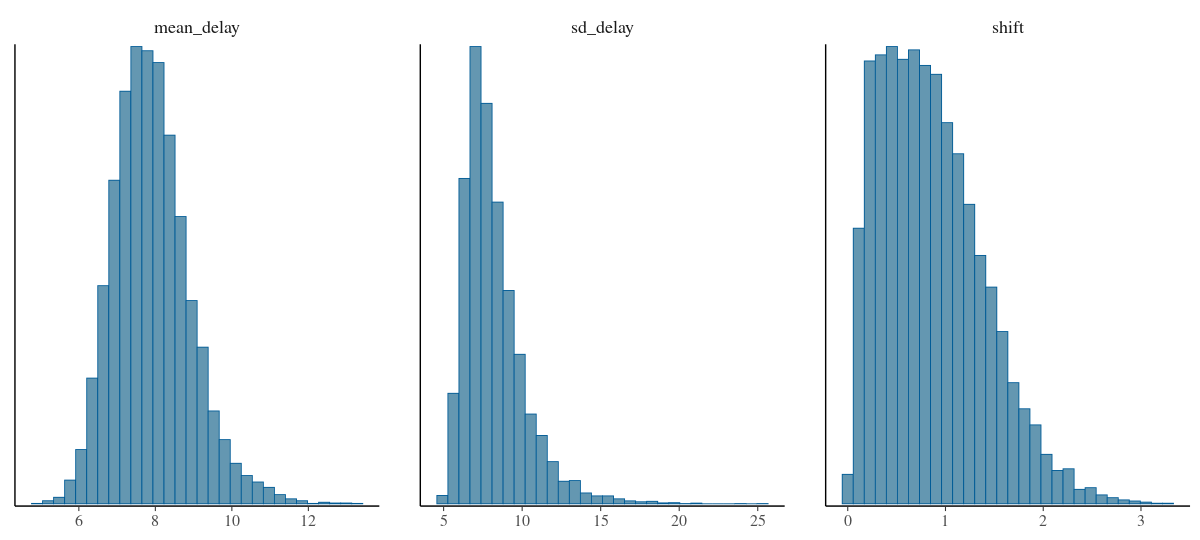

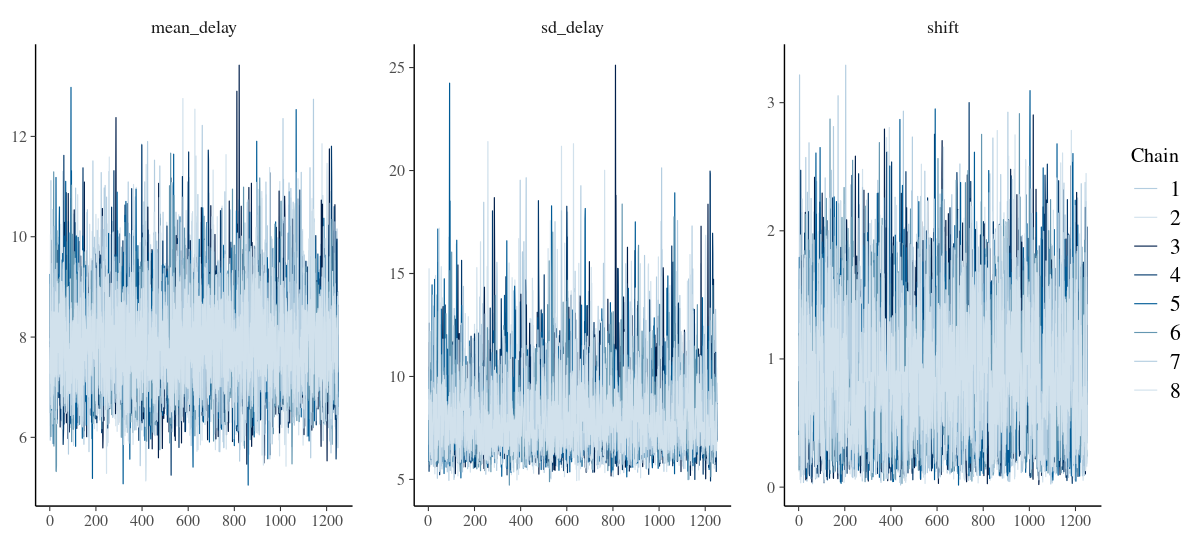

In [38]:
options(repr.plot.width=10, repr.plot.height=4.5)
mcmc_hist(fit_all$draws(c("mean_delay", "sd_delay", "shift")))
mcmc_trace(fit_all$draws(c("mean_delay", "sd_delay", "shift")))

In [39]:
df_delay_outbreak2021 = df_delay_all %>% filter(!is.na(Onset), Onset>=as.Date('2021-01-01'))
df_delay_outbreak2021

Onset,Confirm,onset_day,confirmation_day
<date>,<date>,<dbl>,<dbl>
2021-01-08,2021-01-12,373,377
2021-01-09,2021-01-12,374,377
2021-01-14,2021-01-16,379,381
2021-01-16,2021-01-17,381,382
2021-01-14,2021-01-18,379,383
2021-01-14,2021-01-19,379,384
2021-01-18,2021-01-19,383,384
2021-01-17,2021-01-19,382,384
2021-01-16,2021-01-19,381,384


In [40]:
fit_outbreak2021 = getfit(df_delay_outbreak2021)

{
  "mean_delay_not_shifted": 7,
  "sd_delay": 3,
  "c": 4
}
Running MCMC with 8 parallel chains...

Chain 5 finished in 82.9 seconds.
Chain 2 finished in 84.0 seconds.
Chain 7 finished in 84.8 seconds.
Chain 3 finished in 85.7 seconds.
Chain 4 finished in 112.8 seconds.
Chain 6 finished in 112.8 seconds.
Chain 8 finished in 113.7 seconds.
Chain 1 finished in 114.3 seconds.

All 8 chains finished successfully.
Mean chain execution time: 98.9 seconds.
Total execution time: 114.3 seconds.


In [58]:
output_outbreak2021 = fit_outbreak2021$summary(c("mean_delay", "sd_delay", "shift", "q"), 
                     ~quantile(.x, probs = c(0.5, 0.025, 0.975))) %>% as.data.frame
names(output_outbreak2021) = c("variable", "median", "q2.5", "q97.5")
options(digits = 3)

output_outbreak2021

variable,median,q2.5,q97.5
<chr>,<dbl>,<dbl>,<dbl>
mean_delay,2.5045,1.81e+00,3.451
sd_delay,1.6045,1.13e+00,2.933
shift,0.9698,1.62e-01,2.584
q[1],0.2653,3.28e-03,0.894
q[2],0.5125,1.11e-02,0.994
q[3],0.0499,1.19e-07,0.859


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



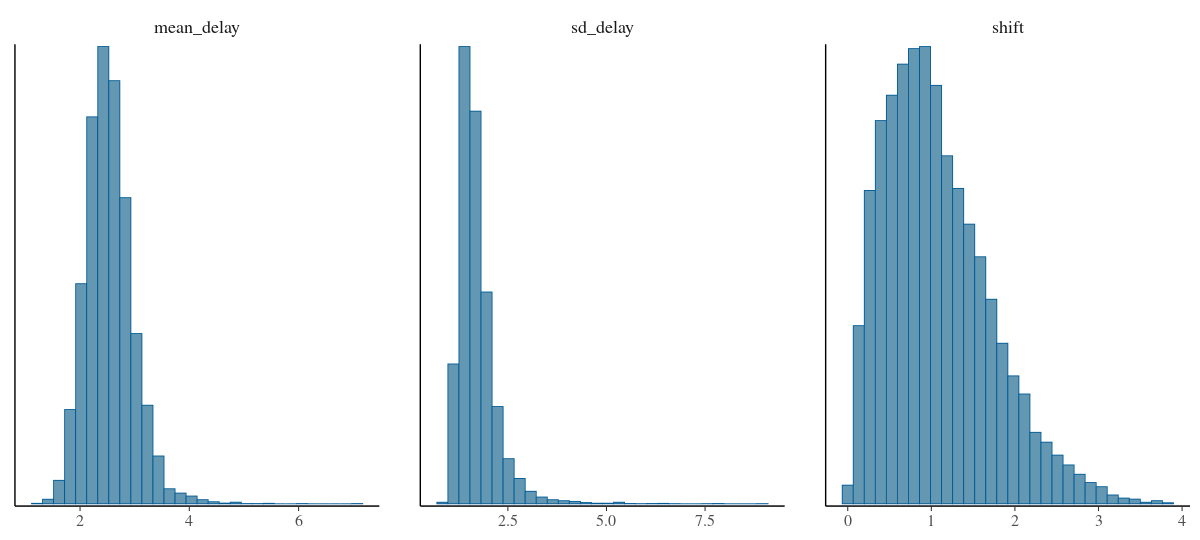

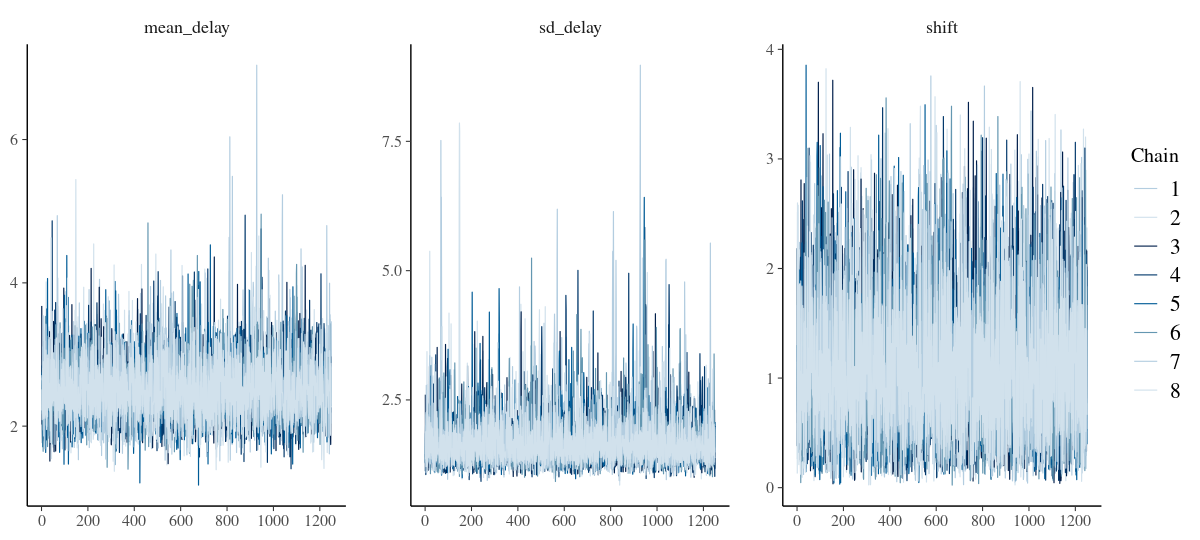

In [59]:
options(repr.plot.width=10, repr.plot.height=4.5)
mcmc_hist(fit_outbreak2021$draws(c("mean_delay", "sd_delay", "shift")))
mcmc_trace(fit_outbreak2021$draws(c("mean_delay", "sd_delay", "shift")))

In [74]:
# End of outbreak
output_ = fit_all$summary(c("Pr"), ~quantile(.x, probs = c(0.5, 0.025, 0.975, 0.25, 0.75), na.rm=T)) %>% as.data.frame
names(output_) = c("variable", "Pr", "Pr_lower", "Pr_upper", "Pr_IQR_lower", "Pr_IQR_upper")
# # Here is some technical thing: to extract the number inside the brackets
# ## for example: Pr[1] will be separated on variable="Pr" and index=1
out = stringr::str_match_all(output_$variable, "[\\d+(.*)]")
output_$index = sapply(out, function(x) as.numeric(paste(x[,1],collapse="")))
output_ %>% 
  mutate(variable = stringr::str_extract(variable, "^[^\\[]+"), day = min(df_epicurve$day) + index - 1) %>%
  select(-index, -variable) %>% select(day, everything()) -> output_all
options(digits = 3)
output_all %>% tail

,day,Pr,Pr_lower,Pr_upper,Pr_IQR_lower,Pr_IQR_upper
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
86,85,0.1362,0.002948,0.554,0.0557,0.262
87,86,0.1256,0.000824,0.540,0.0495,0.249
88,87,0.1161,-0.000868,0.526,0.0442,0.236
89,88,0.1072,-0.002427,0.512,0.0397,0.224
90,89,0.0989,-0.003837,0.499,0.0353,0.212
91,90,0.0913,-0.005257,0.485,0.0316,0.201


In [75]:
output_ = fit_outbreak2021$summary(c("Pr"), ~quantile(.x, probs = c(0.5, 0.025, 0.975, 0.25, 0.75), na.rm=T)) %>% as.data.frame
names(output_) = c("variable", "Pr_outbreak2021", 
                   "Pr_outbreak2021_lower", "Pr_outbreak2021_upper", 
                   "Pr_outbreak2021_IQR_lower", "Pr_outbreak2021_IQR_upper")
out = stringr::str_match_all(output_$variable, "[\\d+(.*)]")
output_$index = sapply(out, function(x) as.numeric(paste(x[,1],collapse="")))
output_ %>% 
  mutate(variable = stringr::str_extract(variable, "^[^\\[]+"), day = min(df_epicurve$day) + index - 1) %>%
  select(-index, -variable) %>% select(day, everything()) -> output_outbreak2021
options(digits = 3)
output_outbreak2021 %>% tail

,day,Pr_outbreak2021,Pr_outbreak2021_lower,Pr_outbreak2021_upper,Pr_outbreak2021_IQR_lower,Pr_outbreak2021_IQR_upper
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
86,85,0.000238,-0.00498,0.0176,-0.000908,0.00179
87,86,0.000237,-0.00506,0.0175,-0.000911,0.00179
88,87,0.000236,-0.00507,0.0174,-0.000912,0.00178
89,88,0.000235,-0.00510,0.0173,-0.000913,0.00178
90,89,0.000233,-0.00514,0.0170,-0.000914,0.00177
91,90,0.000232,-0.00517,0.0170,-0.000915,0.00177


In [76]:
df_epicurve_confirmation %>% right_join(output_all) %>%
    right_join(output_outbreak2021) %>%
    filter(day >= 0) -> df_output 
df_output %>% tail

Joining, by = "day"

Joining, by = "day"



day,cases,Pr,Pr_lower,Pr_upper,Pr_IQR_lower,Pr_IQR_upper,Pr_outbreak2021,Pr_outbreak2021_lower,Pr_outbreak2021_upper,Pr_outbreak2021_IQR_lower,Pr_outbreak2021_IQR_upper
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
85,0,0.1362,0.002948,0.554,0.0557,0.262,0.000238,-0.00498,0.0176,-0.000908,0.00179
86,0,0.1256,0.000824,0.540,0.0495,0.249,0.000237,-0.00506,0.0175,-0.000911,0.00179
87,0,0.1161,-0.000868,0.526,0.0442,0.236,0.000236,-0.00507,0.0174,-0.000912,0.00178
88,0,0.1072,-0.002427,0.512,0.0397,0.224,0.000235,-0.00510,0.0173,-0.000913,0.00178
89,0,0.0989,-0.003837,0.499,0.0353,0.212,0.000233,-0.00514,0.0170,-0.000914,0.00177
90,0,0.0913,-0.005257,0.485,0.0316,0.201,0.000232,-0.00517,0.0170,-0.000915,0.00177


[1] 87.7

[1] 20.8

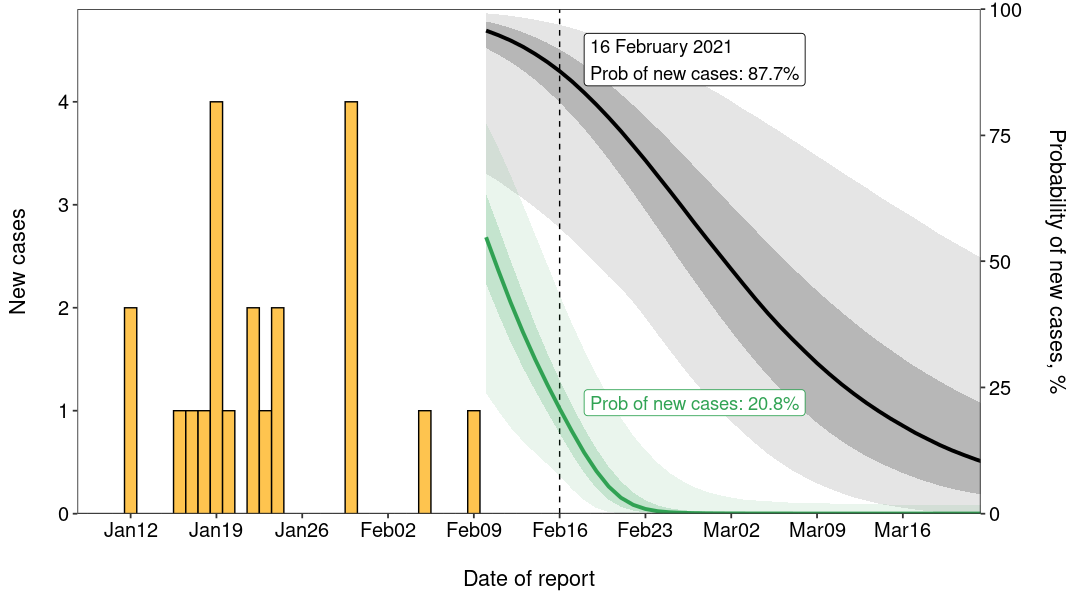

In [77]:
date_ref = as.Date('2021-02-16')
day_ref = as.numeric(date_ref - mindate_end_of_outbreak)

(prob_ref = df_output %>% filter(day == day_ref) %>% .$Pr*100)
(prob_outbreak2021_ref = df_output %>% filter(day == day_ref) %>% .$Pr_outbreak2021*100)

annotation = data.frame(x = rep(56,2), y = c(.9,.22), 
                        label = c(paste0(format(date_ref, "%d %B %Y"),
                                         "\nProb of new cases: ", round(prob_ref, digits=1), "%"),
                                  paste0("Prob of new cases: ", round(prob_outbreak2021_ref, digits=1), "%")),
                        color = c("black", "#31a354"))

ymx = max(df_epicurve_confirmation$cases+.9)
lastonset = max(df_epicurve[df_epicurve$cases > 0,]$day)
scaling_parameter = 1.0/ymx
options(repr.plot.width=9, repr.plot.height=5)

xtks = seq(12, 90, 7)
xtklbs = format(mindate_end_of_outbreak + xtks, "%b%d")

ytks = seq(0, 1, 0.25)
ytklbs = ytks*100

clrs = c("#fec44f", "#31a354", "black")

df_output %>% 
    filter(day >= lastonset + 3) %>%
    ggplot(aes(x=day)) +
        geom_bar(data = df_epicurve_confirmation, 
                 aes(y=cases), stat='identity', alpha=1, color="black", size=.4, width=1, 
                 fill=clrs[1]) +
        #geom_vline(xintercept=lastonset + 2, linetype="dotted", color = "black", size = 0.7) + 
        geom_vline(xintercept=day_ref, linetype="dashed", color = "black", size = 0.4) + 

        geom_line(aes(y=Pr/scaling_parameter), color=clrs[3], size=1.1) +
        geom_ribbon(aes(ymax=Pr_IQR_upper/scaling_parameter, ymin=Pr_IQR_lower/scaling_parameter), fill=clrs[3], alpha = 0.2) +
        geom_ribbon(aes(ymax=Pr_upper/scaling_parameter, ymin=Pr_lower/scaling_parameter), fill=clrs[3], alpha = 0.1) +

        geom_line(aes(y=Pr_outbreak2021/scaling_parameter), color=clrs[2], size=1.1) +
        geom_ribbon(aes(ymax=Pr_outbreak2021_IQR_upper/scaling_parameter, ymin=Pr_outbreak2021_IQR_lower/scaling_parameter), 
                    fill=clrs[2], alpha = 0.2) +
        geom_ribbon(aes(ymax=Pr_outbreak2021_upper/scaling_parameter, ymin=Pr_outbreak2021_lower/scaling_parameter), 
                    fill=clrs[2], alpha = 0.1) +

        labs(x="\nDate of report", y="New cases\n") +
        scale_x_continuous(breaks = xtks, labels = xtklbs) +
        scale_y_continuous(expand = c(0, 0),
                        sec.axis = sec_axis(~.*scaling_parameter, breaks = ytks, labels = ytklbs, 
                                            name = "Probability of new cases, %\n")) +
        geom_label(data=annotation, aes(x=x, y=y/scaling_parameter, label=label, color=color), hjust = 0) +
        scale_colour_manual(values=c(clrs[2], clrs[3])) + 
        coord_cartesian(ylim=c(0,ymx), xlim=c(18,85)) +
        theme_bw() + 
        theme(text = element_text(size=13, family="sans", color="black"),
          axis.text = element_text(size=12, family="sans", color="black"),
          panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
          legend.position = "none") -> pFinal

ggsave(plot=pFinal, width=8, height=4,
       filename="../../figures/draft/Figure2_old.pdf",
       useDingbats=FALSE)

pFinal

In [78]:
mindate_end_of_outbreak + df_output %>% filter(Pr_outbreak2021<.1) %>% head(1) %>% .$day

[1] "2021-02-19"

In [79]:
mindate_end_of_outbreak + df_output %>% filter(Pr<.1) %>% head(1) %>% .$day

[1] "2021-03-23"

# Determining the overdispersion parameter

## Wallinga-Teunis with SI

In [25]:
df_outbreak2021 %>% 
    mutate(Onset = if_else(is.na(Onset), PositiveTest, Onset), day = as.numeric(Onset-mindate_end_of_outbreak)) %>%
    select(ID, day) %>%
    mutate(infector = '-1') -> df_
df_

ID,day,infector
<chr>,<dbl>,<chr>
A0,5,-1
B1.1,15,-1
B1.2,16,-1
B2,21,-1
B3,23,-1
B4.1,21,-1
B4.2,21,-1
B4.3,25,-1
B5,24,-1


In [26]:
# known infector-infectee pairs
df_ %<>% mutate(
    infector = replace(infector, ID=='B1.1', list(c('A0'))),
    infector = replace(infector, ID=='B1.2', list(c('B1.1'))),
    infector = replace(infector, ID=='B2',   list(c('B1.1'))),
    infector = replace(infector, ID=='B3',   list(c('B1.1'))),
    infector = replace(infector, ID=='B1.3', list(c('B1.2'))),
    infector = replace(infector, ID=='B1.4', list(c('B1.2','B1.3'))),
    infector = replace(infector, ID=='B4.1', list(c('B1.1', 'B3', 'B2'))),
    infector = replace(infector, ID=='B4.2', list(c('B4.1'))),
    infector = replace(infector, ID=='B4.3', list(c('B4.1'))),
    infector = replace(infector, ID=='B4.4', list(c('B4.1', 'B4.5', 'B4.6'))),
    infector = replace(infector, ID=='B4.5', list(c('B4.1', 'B4.4', 'B4.6'))),
    infector = replace(infector, ID=='B4.6', list(c('B4.1', 'B4.4', 'B4.5'))),
    infector = replace(infector, ID=='B4.7', list(c('B4.4', 'B4.5', 'B4.6'))),
    infector = replace(infector, ID=='B5',   list(c('B1.1', 'B3', 'B2', 'B4.1'))),
    infector = replace(infector, ID=='B6',   list(c('B1.1'))),
    infector = replace(infector, ID=='C1.1', list(c('B2'))),
    infector = replace(infector, ID=='C1.2', list(c('C1.1', 'C1.3'))),
    infector = replace(infector, ID=='C1.3', list(c('C1.1', 'C1.2'))),
    infector = replace(infector, ID=='D1.1', list(c('B1.1'))), #, 'B2', 'B3', 'B4.1', 'B5', 'B6'
    infector = replace(infector, ID=='D1.2', list(c('D1.1'))),
    infector = replace(infector, ID=='E1', list(c('D1.1'))),
    number = 1:n()
) %>% select(number, ID, day, infector)

df_

number,ID,day,infector
<int>,<chr>,<dbl>,<list>
1,A0,5,-1
2,B1.1,15,A0
3,B1.2,16,B1.1
4,B2,21,B1.1
5,B3,23,B1.1
6,B4.1,21,"B1.1, B3 , B2"
7,B4.2,21,B4.1
8,B4.3,25,B4.1
9,B5,24,"B1.1, B3 , B2 , B4.1"


In [27]:
W = matrix(0, nrow = nrow(df_), ncol = nrow(df_))
for (i in 1:nrow(df_)) 
    for (j in 1:nrow(df_)) 
        if (any(df_[j, 'ID'][[1]]==unlist(df_[i,'infector'], use.names=FALSE))) 
            W[i, j] = df_[i, 'day'][[1]] - df_[j, 'day'][[1]]
W[W<0] = 0
# for B4.2 infected by B4.1 we impute manually because of certain link and negative SI
for (i in 1:nrow(df_)) 
    for (j in 1:nrow(df_)) 
        if ((df_[i, 'ID'][[1]]=='B4.2') & (df_[j, 'ID'][[1]] == 'B4.1'))
            W[i, j] = 1
W = W[-1,]

W

10,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0,1,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0,6,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0,8,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0,6,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,1,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,4,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0,9,0,3,1,3,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0,8,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0,0,9,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0,0,0,7,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


In [28]:
(K_nonzero = rowSums(W>0))
(total_nonzero = sum(K_nonzero))

[1] 1 1 1 1 1 1 1 4 1 1 1 2 1 1 1 1 1 2 2 2 3

[1] 30

In [29]:
(total_variants = prod(K_nonzero[-1]))

[1] 192

In [30]:
W_nonzero = c()
W_nonzero_rows_ind = c(0)
for (i in 1:nrow(W)) {
    W_nonzero = c(W_nonzero, which(!W[i,] == 0))
    W_nonzero_rows_ind = c(W_nonzero_rows_ind, length(W_nonzero))
}
    
(W_nonzero)
list(W_nonzero_rows_ind, length(W_nonzero_rows_ind))

[1]  1  2  2  2  2  6  6  2  4  5  6  2  3  4 12 14 12  2 15  6 15  6 17  6 17
[26]  3 11 17 19 20

[[1]]
 [1]  0  1  2  3  4  5  6  7 11 12 13 14 16 17 18 19 20 21 23 25 27 30

[[2]]
[1] 22

In [86]:
stan_code = "data {
    /* For Wallinga-Teunis matrix */
    int<lower = 1> K; // number of cases
    matrix<lower = 0>[K - 1, K] W;
    int<lower = 1> K_nonzero_total; // number of nonzero observed serial intervals 
    int<lower = 1, upper = K> nonzero_col_ind[K_nonzero_total]; // column indexes of W with non-zero elements
    int<lower = 0> nonzero_row_ind[K]; //row indexes of W for nonzero_col_ind

    int<lower = 1> Pi; // number of all combinations 

    // serial interval parameters
    real mu_si_mean;
    real<lower = 0> sigma_si_mean;
    real mu_si_par1;
    real<lower = 0> sigma_si_par1;
}

transformed data {
    int<lower = 1> K_nonzero[K-1]; // number of nonzero SIs by row
    for (j in 1:K-1)
        K_nonzero[j] = nonzero_row_ind[j+1] - nonzero_row_ind[j];
}

parameters {
    simplex[Pi] weight; // mixing proportions

    real<lower = 0> si_mean;
    real<lower = 0> si_par1;

    real<lower = 0> R0_par;
    real<lower = 0> k_par;
}

transformed parameters {
    real<lower = 0> si_par2 = si_mean / tgamma(1.0 + 1.0 / si_par1);

    matrix[K - 1, K] W_probs = rep_matrix(0.0, K-1, K);
    for (j in 1:K-1) {
        int i0 = nonzero_row_ind[j]+1;
        int i1 = nonzero_row_ind[j+1];
        if (i0==i1)
            W_probs[j, nonzero_col_ind[i0]] = 1.0;
        else {
            for (i_ in i0:i1) 
                W_probs[j, nonzero_col_ind[i_]] = weibull_cdf(W[j, nonzero_col_ind[i_]] + 0.5 | si_par1, si_par2) - weibull_cdf(W[j, nonzero_col_ind[i_]] - 0.5 | si_par1, si_par2);
            W_probs[j, 1:K] = W_probs[j, 1:K] / sum(W_probs[j, 1:K]);
        }
    }
}

model {
    si_mean ~ normal(mu_si_mean, sigma_si_mean);
    si_par1 ~ normal(mu_si_par1, sigma_si_par1);

    R0_par ~ normal(2.4 * 1.3, 4.0);
    k_par ~ std_normal();

    vector[Pi] lps = log(weight);
    {
        int infector_for_j; //vector of infectors 
        int secondary_infections[K] = rep_array(0, K);
        for (k in 1:Pi) {
            int Pi0 = Pi;
            int k0 = 0;
            for (j in 1:K-1) {
                Pi0 /= K_nonzero[j];
                infector_for_j = nonzero_col_ind[nonzero_row_ind[j] + 1 + (k - k0) / Pi0];
                k0 += ((k - k0) / Pi0) * Pi0;
                lps[k] += log(W_probs[j, infector_for_j]);
                secondary_infections[infector_for_j] += 1;
            }
            lps[k] += neg_binomial_2_lpmf(secondary_infections | R0_par, k_par);
        }
    }
    target += log_sum_exp(lps);
}

generated quantities {
    int infector[K-1]; //vector of infectors 

    {
        vector[Pi] q;
        vector[Pi] lps = log(weight);
        int Pi0; int k0;
        for (k in 1:Pi) {
            Pi0 = Pi; k0 = 0;
            for (j in 1:K-1) {
                Pi0 /= K_nonzero[j];
                infector[j] = nonzero_col_ind[nonzero_row_ind[j] + 1 + (k - k0) / Pi0];
                k0 += ((k - k0) / Pi0) * Pi0;
                lps[k] += log(W_probs[j, infector[j]]);
            }
        }
        int comp = categorical_rng(exp(lps - log_sum_exp(lps)));
        Pi0 = Pi; k0 = 0;
        for (j in 1:K-1) {
            Pi0 /= K_nonzero[j];
            infector[j] = nonzero_col_ind[nonzero_row_ind[j] + 1 + (comp - k0) / Pi0];
            k0 += ((comp - k0) / Pi0) * Pi0;
        }
    }
}
"
stan_file = write_stan_file(stan_code)

In [87]:
data_list = list(# for Wallinga-Teunis matrix, 
                 K = ncol(W), 
                 K_nonzero_total = total_nonzero,
                 Pi = total_variants,
                 W = W,
                 nonzero_col_ind = W_nonzero,
                 nonzero_row_ind = W_nonzero_rows_ind,
                 # SI parameters
                 mu_si_mean = 4.848, sigma_si_mean = 0.610,
                 mu_si_par1 = 2.305, sigma_si_par1 = 0.439)
data_file = tempfile(fileext = ".json")
write_stan_json(data_list, data_file)

init_list = list(si_mean = 4.848, si_par1 = 2.305, R0_par = 2.4 * 0.56 * 1.3, k_par = 0.1)
init_file = tempfile(fileext = ".json")
write_stan_json(init_list, init_file)
cat(readLines(init_file), sep = "\n")

mod = cmdstan_model(stan_file)$sample(data = data_file,
                                      init = init_file,
                                      iter_sampling=2500, 
                                      iter_warmup=1000,
                                      refresh = 0,
                                      show_messages = FALSE,
                                      chains=4, 
                                      parallel_chains=4,
                                      seed=1)

{
  "si_mean": 4.848,
  "si_par1": 2.305,
  "R0_par": 1.7472,
  "k_par": 0.1
}


Compiling Stan program...



Running MCMC with 4 parallel chains...

Chain 1 finished in 34.8 seconds.
Chain 2 finished in 34.7 seconds.
Chain 3 finished in 34.7 seconds.
Chain 4 finished in 35.1 seconds.

All 4 chains finished successfully.
Mean chain execution time: 34.8 seconds.
Total execution time: 35.2 seconds.


In [88]:
mod$summary(c("R0_par", "k_par"), ~quantile(.x, probs = c(0.5, 0.025, 0.975))) %>% as.data.frame

variable,50%,2.5%,97.5%
<chr>,<dbl>,<dbl>,<dbl>
R0_par,1.197,0.547,3.67
k_par,0.392,0.125,1.22


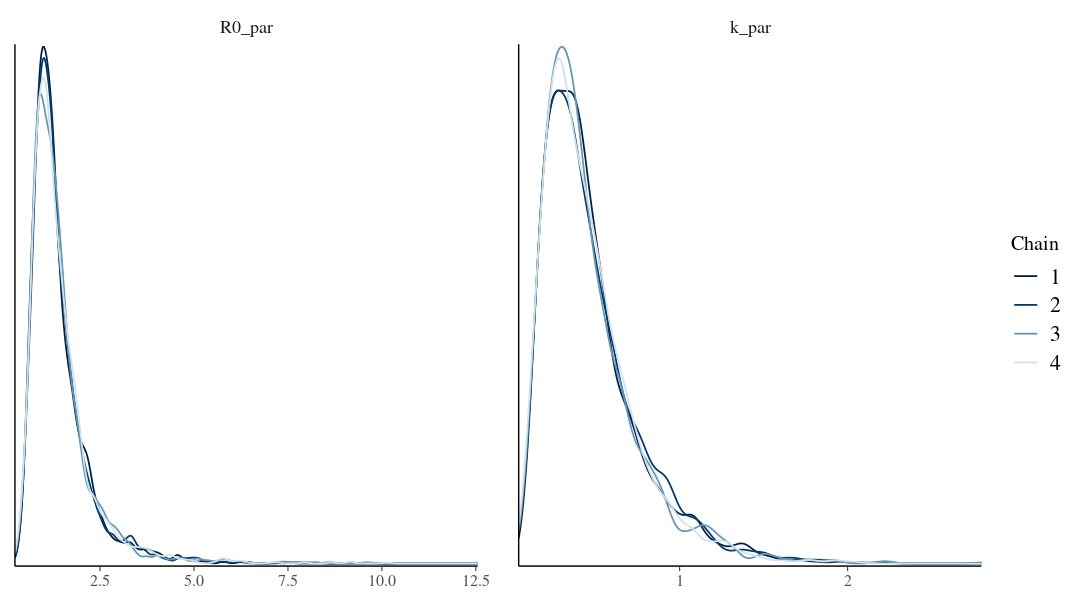

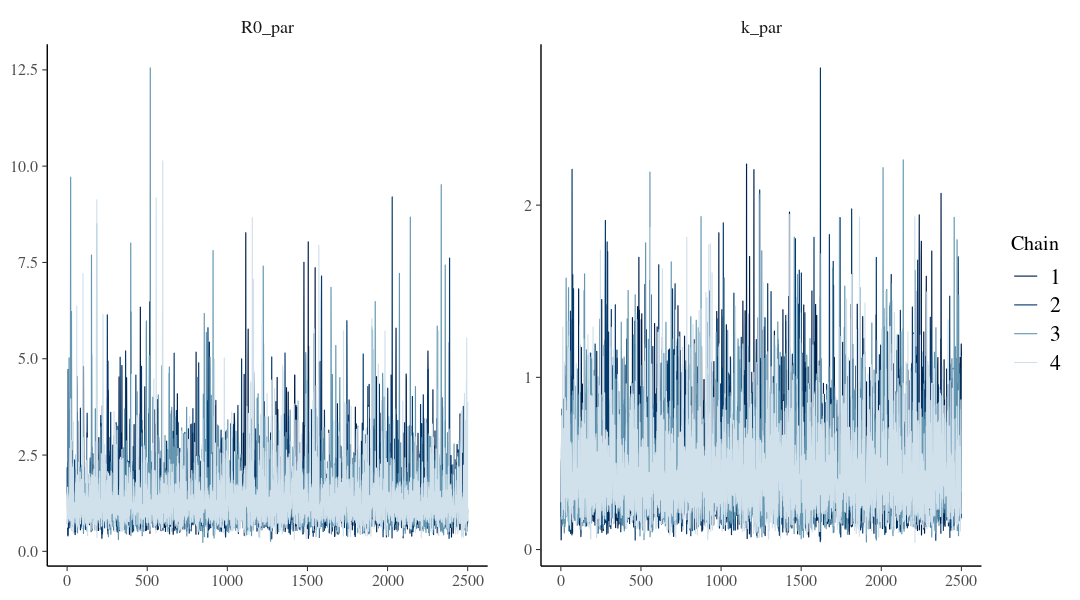

In [89]:
pars_ = c("R0_par", "k_par")
mcmc_dens_overlay(mod$draws(pars_), pars = pars_)
mcmc_trace(mod$draws(pars_), pars = pars_)

In [90]:
mod$save_output_files(dir = paste0(getwd(),"/stan_files"), offspring_di
                      basename = "offspring_distribution", timestamp = FALSE, random = FALSE)

Moved 4 files and set internal paths to new locations:
- /home/aakhmetz/Dropbox/Taiwan_COVID 2021/scripts/Andrei/stan_files/offspring_distribution-1.csv
- /home/aakhmetz/Dropbox/Taiwan_COVID 2021/scripts/Andrei/stan_files/offspring_distribution-2.csv
- /home/aakhmetz/Dropbox/Taiwan_COVID 2021/scripts/Andrei/stan_files/offspring_distribution-3.csv
- /home/aakhmetz/Dropbox/Taiwan_COVID 2021/scripts/Andrei/stan_files/offspring_distribution-4.csv



In [91]:
df_ %>% select(number, ID, day) %>% write.csv(paste0(getwd(),"/stan_files/df_IDs.csv"), row.names = FALSE)

## Fixing R0

In [92]:
stan_code = "data {
    /* For Wallinga-Teunis matrix */
    int<lower = 1> K; // number of cases
    matrix<lower = 0>[K - 1, K] W;
    int<lower = 1> K_nonzero_total; // number of nonzero observed serial intervals 
    int<lower = 1, upper = K> nonzero_col_ind[K_nonzero_total]; // column indexes of W with non-zero elements
    int<lower = 0> nonzero_row_ind[K]; //row indexes of W for nonzero_col_ind

    int<lower = 1> Pi; // number of all combinations 

    // serial interval parameters
    real mu_si_mean;
    real<lower = 0> sigma_si_mean;
    real mu_si_par1;
    real<lower = 0> sigma_si_par1;

    // offspring distribution parameters
    real<lower = 0> R0_par;
}

transformed data {
    int<lower = 1> K_nonzero[K-1]; // number of nonzero SIs by row
    for (j in 1:K-1)
        K_nonzero[j] = nonzero_row_ind[j+1] - nonzero_row_ind[j];
}

parameters {
    simplex[Pi] weight; // mixing proportions

    real<lower = 0> si_mean;
    real<lower = 0> si_par1;

    real<lower = 0> k_par;
}

transformed parameters {
    real<lower = 0> si_par2 = si_mean / tgamma(1.0 + 1.0 / si_par1);

    matrix[K - 1, K] W_probs = rep_matrix(0.0, K-1, K);
    for (j in 1:K-1) {
        int i0 = nonzero_row_ind[j]+1;
        int i1 = nonzero_row_ind[j+1];
        if (i0==i1)
            W_probs[j, nonzero_col_ind[i0]] = 1.0;
        else {
            for (i_ in i0:i1) 
                W_probs[j, nonzero_col_ind[i_]] = weibull_cdf(W[j, nonzero_col_ind[i_]] + 0.5 | si_par1, si_par2) - weibull_cdf(W[j, nonzero_col_ind[i_]] - 0.5 | si_par1, si_par2);
            W_probs[j, 1:K] = W_probs[j, 1:K] / sum(W_probs[j, 1:K]);
        }
    }
}

model {
    si_mean ~ normal(mu_si_mean, sigma_si_mean);
    si_par1 ~ normal(mu_si_par1, sigma_si_par1);

    k_par ~ std_normal();

    vector[Pi] lps = log(weight);
    {
        int infector_for_j; //vector of infectors 
        int secondary_infections[K] = rep_array(0, K);
        for (k in 1:Pi) {
            int Pi0 = Pi;
            int k0 = 0;
            for (j in 1:K-1) {
                Pi0 /= K_nonzero[j];
                infector_for_j = nonzero_col_ind[nonzero_row_ind[j] + 1 + (k - k0) / Pi0];
                k0 += ((k - k0) / Pi0) * Pi0;
                lps[k] += log(W_probs[j, infector_for_j]);
                secondary_infections[infector_for_j] += 1;
            }
            lps[k] += neg_binomial_2_lpmf(secondary_infections | R0_par, k_par);
        }
    }
    target += log_sum_exp(lps);
}

generated quantities {
    int infector[K-1]; //vector of infectors 

    {
        vector[Pi] q;
        vector[Pi] lps = log(weight);
        int Pi0; int k0;
        for (k in 1:Pi) {
            Pi0 = Pi; k0 = 0;
            for (j in 1:K-1) {
                Pi0 /= K_nonzero[j];
                infector[j] = nonzero_col_ind[nonzero_row_ind[j] + 1 + (k - k0) / Pi0];
                k0 += ((k - k0) / Pi0) * Pi0;
                lps[k] += log(W_probs[j, infector[j]]);
            }
        }
        int comp = categorical_rng(exp(lps - log_sum_exp(lps)));
        Pi0 = Pi; k0 = 0;
        for (j in 1:K-1) {
            Pi0 /= K_nonzero[j];
            infector[j] = nonzero_col_ind[nonzero_row_ind[j] + 1 + (comp - k0) / Pi0];
            k0 += ((comp - k0) / Pi0) * Pi0;
        }
    }
}
"
stan_file = write_stan_file(stan_code)

In [93]:
getk_R0fix = function(R0) {
    data_list = list(# for Wallinga-Teunis matrix, 
                     K = ncol(W), 
                     K_nonzero_total = total_nonzero,
                     Pi = total_variants,
                     W = W,
                     nonzero_col_ind = W_nonzero,
                     nonzero_row_ind = W_nonzero_rows_ind,
                     R0_par = R0,
                     mu_si_mean = 4.848, sigma_si_mean = 0.610,
                     mu_si_par1 = 2.305, sigma_si_par1 = 0.439)
    data_file = tempfile(fileext = ".json")
    write_stan_json(data_list, data_file)
    
    init_list = list(si_mean = 4.848, si_par1 = 2.305, k_par = 0.25)
    init_file = tempfile(fileext = ".json")
    write_stan_json(init_list, init_file)
    cat(readLines(init_file), sep = "\n")

    mod = cmdstan_model(stan_file)$sample(data = data_file,
                                          init = init_file,
                                          iter_sampling=12500, 
                                          iter_warmup=2500,
                                          chains=4, 
                                          parallel_chains=4,
                                          adapt_delta=0.92,
                                          refresh=0,
                                          show_messages=FALSE,
                                          seed=123)

    mod$summary(c("k_par"), ~quantile(.x, probs = c(0.5, 0.025, 0.975, 0.25, 0.75))) %>% as.data.frame -> df_k
    df_k %<>% select(-variable) 
    names(df_k) = c('k_median', 'k_lower', 'k_upper', 'k_IQR_lower', 'k_IQR_upper')
    df_k$R0 = R0
    df_k$lp__ = mod$summary(c("lp__"))$mean
    df_k %<>% select(R0, everything())
    
    return(df_k)
}

In [94]:
idx0 = TRUE
step = 0.1
for (R0 in seq(step, 5.0 + step, step)) {
    df_k_ = getk_R0fix(R0)
    if (idx0) {
        df_k = df_k_
        idx0 = FALSE 
    } else 
        df_k %<>% rbind(df_k_)
    print(df_k_)
}

{
  "si_mean": 4.848,
  "si_par1": 2.305,
  "k_par": 0.25
}


Compiling Stan program...



Running MCMC with 4 parallel chains...

Chain 2 finished in 169.6 seconds.
Chain 1 finished in 203.3 seconds.
Chain 4 finished in 234.8 seconds.
Chain 3 finished in 246.4 seconds.

All 4 chains finished successfully.
Mean chain execution time: 213.5 seconds.
Total execution time: 246.5 seconds.
   R0 k_median k_lower k_upper k_IQR_lower k_IQR_upper  lp__
1 0.1    0.076  0.0291   0.198      0.0552       0.105 -1187
{
  "si_mean": 4.848,
  "si_par1": 2.305,
  "k_par": 0.25
}


Model executable is up to date!



Running MCMC with 4 parallel chains...

Chain 1 finished in 167.5 seconds.
Chain 3 finished in 223.0 seconds.
Chain 4 finished in 235.3 seconds.
Chain 2 finished in 251.6 seconds.

All 4 chains finished successfully.
Mean chain execution time: 219.4 seconds.
Total execution time: 251.7 seconds.
   R0 k_median k_lower k_upper k_IQR_lower k_IQR_upper  lp__
1 0.2    0.154  0.0572   0.427       0.109       0.218 -1182
{
  "si_mean": 4.848,
  "si_par1": 2.305,
  "k_par": 0.25
}


Model executable is up to date!



Running MCMC with 4 parallel chains...

Chain 3 finished in 145.3 seconds.
Chain 1 finished in 151.3 seconds.
Chain 4 finished in 193.3 seconds.
Chain 2 finished in 227.3 seconds.

All 4 chains finished successfully.
Mean chain execution time: 179.3 seconds.
Total execution time: 227.4 seconds.



This may indicate insufficient exploration of the posterior distribution.
Possible remedies include: 
  * Increasing adapt_delta closer to 1 (default is 0.8) 
  * Reparameterizing the model (e.g. using a non-centered parameterization)
  * Using informative or weakly informative prior distributions 




   R0 k_median k_lower k_upper k_IQR_lower k_IQR_upper  lp__
1 0.3    0.229  0.0815   0.668       0.161       0.329 -1179
{
  "si_mean": 4.848,
  "si_par1": 2.305,
  "k_par": 0.25
}


Model executable is up to date!



Running MCMC with 4 parallel chains...

Chain 2 finished in 191.3 seconds.
Chain 1 finished in 221.6 seconds.
Chain 3 finished in 236.7 seconds.
Chain 4 finished in 238.6 seconds.

All 4 chains finished successfully.
Mean chain execution time: 222.1 seconds.
Total execution time: 238.8 seconds.
   R0 k_median k_lower k_upper k_IQR_lower k_IQR_upper  lp__
1 0.4    0.297   0.102   0.896       0.206        0.43 -1177
{
  "si_mean": 4.848,
  "si_par1": 2.305,
  "k_par": 0.25
}


Model executable is up to date!



Running MCMC with 4 parallel chains...

Chain 4 finished in 147.8 seconds.
Chain 2 finished in 230.8 seconds.
Chain 3 finished in 234.6 seconds.
Chain 1 finished in 234.8 seconds.

All 4 chains finished successfully.
Mean chain execution time: 212.0 seconds.
Total execution time: 234.8 seconds.
   R0 k_median k_lower k_upper k_IQR_lower k_IQR_upper  lp__
1 0.5    0.355   0.122    1.05       0.246       0.515 -1176
{
  "si_mean": 4.848,
  "si_par1": 2.305,
  "k_par": 0.25
}


Model executable is up to date!



Running MCMC with 4 parallel chains...

Chain 2 finished in 144.9 seconds.
Chain 4 finished in 178.3 seconds.
Chain 3 finished in 217.6 seconds.
Chain 1 finished in 222.8 seconds.

All 4 chains finished successfully.
Mean chain execution time: 190.9 seconds.
Total execution time: 222.9 seconds.
   R0 k_median k_lower k_upper k_IQR_lower k_IQR_upper  lp__
1 0.6    0.401   0.132    1.19       0.274       0.586 -1176
{
  "si_mean": 4.848,
  "si_par1": 2.305,
  "k_par": 0.25
}


Model executable is up to date!



Running MCMC with 4 parallel chains...

Chain 4 finished in 218.2 seconds.
Chain 3 finished in 229.7 seconds.
Chain 1 finished in 238.9 seconds.
Chain 2 finished in 242.4 seconds.

All 4 chains finished successfully.
Mean chain execution time: 232.3 seconds.
Total execution time: 242.5 seconds.



This may indicate insufficient exploration of the posterior distribution.
Possible remedies include: 
  * Increasing adapt_delta closer to 1 (default is 0.8) 
  * Reparameterizing the model (e.g. using a non-centered parameterization)
  * Using informative or weakly informative prior distributions 




   R0 k_median k_lower k_upper k_IQR_lower k_IQR_upper  lp__
1 0.7    0.429   0.142    1.27       0.293       0.629 -1175
{
  "si_mean": 4.848,
  "si_par1": 2.305,
  "k_par": 0.25
}


Model executable is up to date!



Running MCMC with 4 parallel chains...

Chain 1 finished in 169.3 seconds.
Chain 3 finished in 213.8 seconds.
Chain 2 finished in 232.8 seconds.
Chain 4 finished in 235.5 seconds.

All 4 chains finished successfully.
Mean chain execution time: 212.8 seconds.
Total execution time: 235.6 seconds.
   R0 k_median k_lower k_upper k_IQR_lower k_IQR_upper  lp__
1 0.8    0.448   0.147    1.32       0.304       0.656 -1175
{
  "si_mean": 4.848,
  "si_par1": 2.305,
  "k_par": 0.25
}


Model executable is up to date!



Running MCMC with 4 parallel chains...

Chain 2 finished in 176.7 seconds.
Chain 3 finished in 183.9 seconds.
Chain 1 finished in 190.8 seconds.
Chain 4 finished in 236.7 seconds.

All 4 chains finished successfully.
Mean chain execution time: 197.0 seconds.
Total execution time: 236.8 seconds.
   R0 k_median k_lower k_upper k_IQR_lower k_IQR_upper  lp__
1 0.9    0.458   0.148    1.34       0.311        0.67 -1175
{
  "si_mean": 4.848,
  "si_par1": 2.305,
  "k_par": 0.25
}


Model executable is up to date!



Running MCMC with 4 parallel chains...

Chain 3 finished in 135.8 seconds.
Chain 1 finished in 170.6 seconds.
Chain 4 finished in 197.0 seconds.
Chain 2 finished in 197.9 seconds.

All 4 chains finished successfully.
Mean chain execution time: 175.3 seconds.
Total execution time: 198.0 seconds.
  R0 k_median k_lower k_upper k_IQR_lower k_IQR_upper  lp__
1  1    0.457    0.15    1.36       0.312       0.672 -1175
{
  "si_mean": 4.848,
  "si_par1": 2.305,
  "k_par": 0.25
}


Model executable is up to date!



Running MCMC with 4 parallel chains...

Chain 3 finished in 148.2 seconds.
Chain 2 finished in 203.3 seconds.
Chain 4 finished in 222.3 seconds.
Chain 1 finished in 235.2 seconds.

All 4 chains finished successfully.
Mean chain execution time: 202.2 seconds.
Total execution time: 235.3 seconds.
   R0 k_median k_lower k_upper k_IQR_lower k_IQR_upper  lp__
1 1.1    0.452   0.149    1.34       0.308       0.665 -1175
{
  "si_mean": 4.848,
  "si_par1": 2.305,
  "k_par": 0.25
}


Model executable is up to date!



Running MCMC with 4 parallel chains...

Chain 3 finished in 141.3 seconds.
Chain 4 finished in 151.2 seconds.
Chain 1 finished in 174.6 seconds.
Chain 2 finished in 226.3 seconds.

All 4 chains finished successfully.
Mean chain execution time: 173.3 seconds.
Total execution time: 226.3 seconds.
   R0 k_median k_lower k_upper k_IQR_lower k_IQR_upper  lp__
1 1.2    0.442   0.145    1.31       0.302       0.649 -1175
{
  "si_mean": 4.848,
  "si_par1": 2.305,
  "k_par": 0.25
}


Model executable is up to date!



Running MCMC with 4 parallel chains...

Chain 4 finished in 138.6 seconds.
Chain 2 finished in 138.9 seconds.
Chain 1 finished in 178.5 seconds.
Chain 3 finished in 183.4 seconds.

All 4 chains finished successfully.
Mean chain execution time: 159.8 seconds.
Total execution time: 183.5 seconds.
   R0 k_median k_lower k_upper k_IQR_lower k_IQR_upper  lp__
1 1.3    0.428   0.141    1.28       0.293       0.627 -1175
{
  "si_mean": 4.848,
  "si_par1": 2.305,
  "k_par": 0.25
}


Model executable is up to date!



Running MCMC with 4 parallel chains...

Chain 2 finished in 167.0 seconds.
Chain 3 finished in 221.7 seconds.
Chain 4 finished in 222.9 seconds.
Chain 1 finished in 247.5 seconds.

All 4 chains finished successfully.
Mean chain execution time: 214.8 seconds.
Total execution time: 247.6 seconds.
   R0 k_median k_lower k_upper k_IQR_lower k_IQR_upper  lp__
1 1.4    0.413   0.137    1.22       0.283       0.606 -1175
{
  "si_mean": 4.848,
  "si_par1": 2.305,
  "k_par": 0.25
}


Model executable is up to date!



Running MCMC with 4 parallel chains...

Chain 1 finished in 140.7 seconds.
Chain 2 finished in 146.5 seconds.
Chain 3 finished in 159.9 seconds.
Chain 4 finished in 213.1 seconds.

All 4 chains finished successfully.
Mean chain execution time: 165.0 seconds.
Total execution time: 213.3 seconds.
   R0 k_median k_lower k_upper k_IQR_lower k_IQR_upper  lp__
1 1.5    0.399   0.133    1.17       0.273        0.58 -1176
{
  "si_mean": 4.848,
  "si_par1": 2.305,
  "k_par": 0.25
}


Model executable is up to date!



Running MCMC with 4 parallel chains...

Chain 3 finished in 179.5 seconds.
Chain 4 finished in 192.3 seconds.
Chain 1 finished in 234.1 seconds.
Chain 2 finished in 235.8 seconds.

All 4 chains finished successfully.
Mean chain execution time: 210.4 seconds.
Total execution time: 235.9 seconds.
   R0 k_median k_lower k_upper k_IQR_lower k_IQR_upper  lp__
1 1.6    0.381   0.129    1.12       0.263       0.556 -1176
{
  "si_mean": 4.848,
  "si_par1": 2.305,
  "k_par": 0.25
}


Model executable is up to date!



Running MCMC with 4 parallel chains...

Chain 3 finished in 145.5 seconds.
Chain 4 finished in 179.6 seconds.
Chain 1 finished in 236.9 seconds.
Chain 2 finished in 239.8 seconds.

All 4 chains finished successfully.
Mean chain execution time: 200.5 seconds.
Total execution time: 239.9 seconds.
   R0 k_median k_lower k_upper k_IQR_lower k_IQR_upper  lp__
1 1.7    0.368   0.125    1.06       0.254       0.529 -1176
{
  "si_mean": 4.848,
  "si_par1": 2.305,
  "k_par": 0.25
}


Model executable is up to date!



Running MCMC with 4 parallel chains...

Chain 1 finished in 139.8 seconds.
Chain 3 finished in 153.4 seconds.
Chain 4 finished in 219.5 seconds.
Chain 2 finished in 225.9 seconds.

All 4 chains finished successfully.
Mean chain execution time: 184.6 seconds.
Total execution time: 226.0 seconds.



This may indicate insufficient exploration of the posterior distribution.
Possible remedies include: 
  * Increasing adapt_delta closer to 1 (default is 0.8) 
  * Reparameterizing the model (e.g. using a non-centered parameterization)
  * Using informative or weakly informative prior distributions 




   R0 k_median k_lower k_upper k_IQR_lower k_IQR_upper  lp__
1 1.8    0.351   0.122   0.996       0.245       0.504 -1176
{
  "si_mean": 4.848,
  "si_par1": 2.305,
  "k_par": 0.25
}


Model executable is up to date!



Running MCMC with 4 parallel chains...

Chain 3 finished in 159.7 seconds.
Chain 2 finished in 203.6 seconds.
Chain 1 finished in 224.7 seconds.
Chain 4 finished in 228.1 seconds.

All 4 chains finished successfully.
Mean chain execution time: 204.0 seconds.
Total execution time: 228.2 seconds.
   R0 k_median k_lower k_upper k_IQR_lower k_IQR_upper  lp__
1 1.9    0.339   0.119   0.951       0.237       0.484 -1176
{
  "si_mean": 4.848,
  "si_par1": 2.305,
  "k_par": 0.25
}


Model executable is up to date!



Running MCMC with 4 parallel chains...

Chain 4 finished in 152.0 seconds.
Chain 1 finished in 194.5 seconds.
Chain 3 finished in 211.5 seconds.
Chain 2 finished in 225.7 seconds.

All 4 chains finished successfully.
Mean chain execution time: 195.9 seconds.
Total execution time: 225.8 seconds.
  R0 k_median k_lower k_upper k_IQR_lower k_IQR_upper  lp__
1  2    0.323   0.115     0.9       0.227       0.459 -1177
{
  "si_mean": 4.848,
  "si_par1": 2.305,
  "k_par": 0.25
}


Model executable is up to date!



Running MCMC with 4 parallel chains...

Chain 3 finished in 166.0 seconds.
Chain 2 finished in 198.9 seconds.
Chain 1 finished in 210.7 seconds.
Chain 4 finished in 237.1 seconds.

All 4 chains finished successfully.
Mean chain execution time: 203.1 seconds.
Total execution time: 237.1 seconds.
   R0 k_median k_lower k_upper k_IQR_lower k_IQR_upper  lp__
1 2.1    0.314   0.112   0.849       0.222       0.442 -1177
{
  "si_mean": 4.848,
  "si_par1": 2.305,
  "k_par": 0.25
}


Model executable is up to date!



Running MCMC with 4 parallel chains...

Chain 4 finished in 151.0 seconds.
Chain 1 finished in 178.9 seconds.
Chain 3 finished in 199.5 seconds.
Chain 2 finished in 224.0 seconds.

All 4 chains finished successfully.
Mean chain execution time: 188.3 seconds.
Total execution time: 224.0 seconds.
   R0 k_median k_lower k_upper k_IQR_lower k_IQR_upper  lp__
1 2.2    0.299   0.107   0.815       0.213       0.421 -1177
{
  "si_mean": 4.848,
  "si_par1": 2.305,
  "k_par": 0.25
}


Model executable is up to date!



Running MCMC with 4 parallel chains...

Chain 3 finished in 136.9 seconds.
Chain 2 finished in 229.4 seconds.
Chain 4 finished in 232.4 seconds.
Chain 1 finished in 234.5 seconds.

All 4 chains finished successfully.
Mean chain execution time: 208.3 seconds.
Total execution time: 234.6 seconds.
   R0 k_median k_lower k_upper k_IQR_lower k_IQR_upper  lp__
1 2.3    0.292   0.106   0.779       0.208        0.41 -1177
{
  "si_mean": 4.848,
  "si_par1": 2.305,
  "k_par": 0.25
}


Model executable is up to date!



Running MCMC with 4 parallel chains...

Chain 1 finished in 209.0 seconds.
Chain 3 finished in 226.9 seconds.
Chain 4 finished in 227.8 seconds.
Chain 2 finished in 235.8 seconds.

All 4 chains finished successfully.
Mean chain execution time: 224.9 seconds.
Total execution time: 235.9 seconds.
   R0 k_median k_lower k_upper k_IQR_lower k_IQR_upper  lp__
1 2.4    0.283   0.103   0.746       0.202       0.394 -1177
{
  "si_mean": 4.848,
  "si_par1": 2.305,
  "k_par": 0.25
}


Model executable is up to date!



Running MCMC with 4 parallel chains...

Chain 2 finished in 194.4 seconds.
Chain 1 finished in 217.3 seconds.
Chain 3 finished in 227.5 seconds.
Chain 4 finished in 238.4 seconds.

All 4 chains finished successfully.
Mean chain execution time: 219.4 seconds.
Total execution time: 238.5 seconds.
   R0 k_median k_lower k_upper k_IQR_lower k_IQR_upper  lp__
1 2.5    0.273   0.101   0.704       0.195        0.38 -1177
{
  "si_mean": 4.848,
  "si_par1": 2.305,
  "k_par": 0.25
}


Model executable is up to date!



Running MCMC with 4 parallel chains...

Chain 1 finished in 184.8 seconds.
Chain 2 finished in 203.2 seconds.
Chain 3 finished in 226.8 seconds.
Chain 4 finished in 243.0 seconds.

All 4 chains finished successfully.
Mean chain execution time: 214.4 seconds.
Total execution time: 243.1 seconds.
   R0 k_median k_lower k_upper k_IQR_lower k_IQR_upper  lp__
1 2.6    0.265  0.0993   0.679       0.191       0.368 -1177
{
  "si_mean": 4.848,
  "si_par1": 2.305,
  "k_par": 0.25
}


Model executable is up to date!



Running MCMC with 4 parallel chains...

Chain 2 finished in 183.2 seconds.
Chain 1 finished in 186.0 seconds.
Chain 4 finished in 217.6 seconds.
Chain 3 finished in 232.1 seconds.

All 4 chains finished successfully.
Mean chain execution time: 204.7 seconds.
Total execution time: 232.2 seconds.



This may indicate insufficient exploration of the posterior distribution.
Possible remedies include: 
  * Increasing adapt_delta closer to 1 (default is 0.8) 
  * Reparameterizing the model (e.g. using a non-centered parameterization)
  * Using informative or weakly informative prior distributions 




   R0 k_median k_lower k_upper k_IQR_lower k_IQR_upper  lp__
1 2.7    0.259  0.0982   0.653       0.186       0.357 -1178
{
  "si_mean": 4.848,
  "si_par1": 2.305,
  "k_par": 0.25
}


Model executable is up to date!



Running MCMC with 4 parallel chains...

Chain 3 finished in 146.4 seconds.
Chain 2 finished in 161.6 seconds.
Chain 1 finished in 220.8 seconds.
Chain 4 finished in 225.5 seconds.

All 4 chains finished successfully.
Mean chain execution time: 188.6 seconds.
Total execution time: 225.5 seconds.
   R0 k_median k_lower k_upper k_IQR_lower k_IQR_upper  lp__
1 2.8    0.251  0.0948   0.633       0.181       0.347 -1178
{
  "si_mean": 4.848,
  "si_par1": 2.305,
  "k_par": 0.25
}


Model executable is up to date!



Running MCMC with 4 parallel chains...

Chain 3 finished in 167.8 seconds.
Chain 2 finished in 174.2 seconds.
Chain 4 finished in 187.9 seconds.
Chain 1 finished in 232.4 seconds.

All 4 chains finished successfully.
Mean chain execution time: 190.6 seconds.
Total execution time: 232.4 seconds.
   R0 k_median k_lower k_upper k_IQR_lower k_IQR_upper  lp__
1 2.9    0.245   0.093   0.613       0.176       0.338 -1178
{
  "si_mean": 4.848,
  "si_par1": 2.305,
  "k_par": 0.25
}


Model executable is up to date!



Running MCMC with 4 parallel chains...

Chain 1 finished in 189.7 seconds.
Chain 2 finished in 192.2 seconds.
Chain 4 finished in 193.2 seconds.
Chain 3 finished in 207.6 seconds.

All 4 chains finished successfully.
Mean chain execution time: 195.7 seconds.
Total execution time: 207.7 seconds.
  R0 k_median k_lower k_upper k_IQR_lower k_IQR_upper  lp__
1  3    0.239  0.0906   0.588       0.173       0.328 -1178
{
  "si_mean": 4.848,
  "si_par1": 2.305,
  "k_par": 0.25
}


Model executable is up to date!



Running MCMC with 4 parallel chains...

Chain 4 finished in 148.4 seconds.
Chain 2 finished in 203.1 seconds.
Chain 1 finished in 212.0 seconds.
Chain 3 finished in 235.7 seconds.

All 4 chains finished successfully.
Mean chain execution time: 199.8 seconds.
Total execution time: 235.8 seconds.
   R0 k_median k_lower k_upper k_IQR_lower k_IQR_upper  lp__
1 3.1    0.235  0.0908   0.565        0.17        0.32 -1178
{
  "si_mean": 4.848,
  "si_par1": 2.305,
  "k_par": 0.25
}


Model executable is up to date!



Running MCMC with 4 parallel chains...

Chain 1 finished in 140.5 seconds.
Chain 3 finished in 217.7 seconds.
Chain 2 finished in 226.9 seconds.
Chain 4 finished in 227.9 seconds.

All 4 chains finished successfully.
Mean chain execution time: 203.3 seconds.
Total execution time: 228.0 seconds.
   R0 k_median k_lower k_upper k_IQR_lower k_IQR_upper  lp__
1 3.2    0.229  0.0882   0.553       0.167        0.31 -1178
{
  "si_mean": 4.848,
  "si_par1": 2.305,
  "k_par": 0.25
}


Model executable is up to date!



Running MCMC with 4 parallel chains...

Chain 4 finished in 146.0 seconds.
Chain 3 finished in 154.3 seconds.
Chain 2 finished in 166.1 seconds.
Chain 1 finished in 205.7 seconds.

All 4 chains finished successfully.
Mean chain execution time: 168.0 seconds.
Total execution time: 205.8 seconds.
   R0 k_median k_lower k_upper k_IQR_lower k_IQR_upper  lp__
1 3.3    0.224  0.0853   0.536       0.163       0.304 -1178
{
  "si_mean": 4.848,
  "si_par1": 2.305,
  "k_par": 0.25
}


Model executable is up to date!



Running MCMC with 4 parallel chains...

Chain 4 finished in 169.8 seconds.
Chain 2 finished in 226.6 seconds.
Chain 1 finished in 230.4 seconds.
Chain 3 finished in 237.4 seconds.

All 4 chains finished successfully.
Mean chain execution time: 216.0 seconds.
Total execution time: 237.5 seconds.
   R0 k_median k_lower k_upper k_IQR_lower k_IQR_upper  lp__
1 3.4     0.22  0.0843   0.533        0.16       0.299 -1178
{
  "si_mean": 4.848,
  "si_par1": 2.305,
  "k_par": 0.25
}


Model executable is up to date!



Running MCMC with 4 parallel chains...

Chain 2 finished in 138.7 seconds.
Chain 1 finished in 145.0 seconds.
Chain 3 finished in 155.7 seconds.
Chain 4 finished in 214.0 seconds.

All 4 chains finished successfully.
Mean chain execution time: 163.4 seconds.
Total execution time: 214.2 seconds.
   R0 k_median k_lower k_upper k_IQR_lower k_IQR_upper  lp__
1 3.5    0.215   0.085   0.507       0.158       0.291 -1178
{
  "si_mean": 4.848,
  "si_par1": 2.305,
  "k_par": 0.25
}


Model executable is up to date!



Running MCMC with 4 parallel chains...

Chain 1 finished in 139.2 seconds.
Chain 2 finished in 170.5 seconds.
Chain 4 finished in 174.2 seconds.
Chain 3 finished in 224.3 seconds.

All 4 chains finished successfully.
Mean chain execution time: 177.0 seconds.
Total execution time: 224.4 seconds.
   R0 k_median k_lower k_upper k_IQR_lower k_IQR_upper  lp__
1 3.6    0.212  0.0832     0.5       0.156       0.285 -1178
{
  "si_mean": 4.848,
  "si_par1": 2.305,
  "k_par": 0.25
}


Model executable is up to date!



Running MCMC with 4 parallel chains...

Chain 1 finished in 159.4 seconds.
Chain 4 finished in 207.0 seconds.
Chain 2 finished in 232.5 seconds.
Chain 3 finished in 236.4 seconds.

All 4 chains finished successfully.
Mean chain execution time: 208.8 seconds.
Total execution time: 236.6 seconds.
   R0 k_median k_lower k_upper k_IQR_lower k_IQR_upper  lp__
1 3.7    0.208  0.0822   0.485       0.152       0.281 -1179
{
  "si_mean": 4.848,
  "si_par1": 2.305,
  "k_par": 0.25
}


Model executable is up to date!



Running MCMC with 4 parallel chains...

Chain 1 finished in 145.6 seconds.
Chain 4 finished in 162.4 seconds.
Chain 3 finished in 208.3 seconds.
Chain 2 finished in 229.2 seconds.

All 4 chains finished successfully.
Mean chain execution time: 186.4 seconds.
Total execution time: 229.2 seconds.
   R0 k_median k_lower k_upper k_IQR_lower k_IQR_upper  lp__
1 3.8    0.204  0.0793   0.477        0.15       0.276 -1179
{
  "si_mean": 4.848,
  "si_par1": 2.305,
  "k_par": 0.25
}


Model executable is up to date!



Running MCMC with 4 parallel chains...

Chain 4 finished in 150.7 seconds.
Chain 1 finished in 157.6 seconds.
Chain 2 finished in 227.4 seconds.
Chain 3 finished in 231.1 seconds.

All 4 chains finished successfully.
Mean chain execution time: 191.7 seconds.
Total execution time: 231.1 seconds.
   R0 k_median k_lower k_upper k_IQR_lower k_IQR_upper  lp__
1 3.9    0.201   0.079   0.464       0.147       0.271 -1179
{
  "si_mean": 4.848,
  "si_par1": 2.305,
  "k_par": 0.25
}


Model executable is up to date!



Running MCMC with 4 parallel chains...

Chain 1 finished in 168.7 seconds.
Chain 3 finished in 184.6 seconds.
Chain 4 finished in 226.9 seconds.
Chain 2 finished in 231.7 seconds.

All 4 chains finished successfully.
Mean chain execution time: 203.0 seconds.
Total execution time: 231.9 seconds.
  R0 k_median k_lower k_upper k_IQR_lower k_IQR_upper  lp__
1  4    0.198  0.0781   0.456       0.146       0.266 -1179
{
  "si_mean": 4.848,
  "si_par1": 2.305,
  "k_par": 0.25
}


Model executable is up to date!



Running MCMC with 4 parallel chains...

Chain 2 finished in 144.9 seconds.
Chain 3 finished in 185.6 seconds.
Chain 4 finished in 221.7 seconds.
Chain 1 finished in 232.3 seconds.

All 4 chains finished successfully.
Mean chain execution time: 196.1 seconds.
Total execution time: 232.4 seconds.
   R0 k_median k_lower k_upper k_IQR_lower k_IQR_upper  lp__
1 4.1    0.195  0.0765   0.451       0.143       0.262 -1179
{
  "si_mean": 4.848,
  "si_par1": 2.305,
  "k_par": 0.25
}


Model executable is up to date!



Running MCMC with 4 parallel chains...

Chain 4 finished in 146.6 seconds.
Chain 1 finished in 174.5 seconds.
Chain 2 finished in 224.9 seconds.
Chain 3 finished in 235.3 seconds.

All 4 chains finished successfully.
Mean chain execution time: 195.3 seconds.
Total execution time: 235.4 seconds.



This may indicate insufficient exploration of the posterior distribution.
Possible remedies include: 
  * Increasing adapt_delta closer to 1 (default is 0.8) 
  * Reparameterizing the model (e.g. using a non-centered parameterization)
  * Using informative or weakly informative prior distributions 




   R0 k_median k_lower k_upper k_IQR_lower k_IQR_upper  lp__
1 4.2    0.192  0.0773   0.443       0.141       0.258 -1179
{
  "si_mean": 4.848,
  "si_par1": 2.305,
  "k_par": 0.25
}


Model executable is up to date!



Running MCMC with 4 parallel chains...

Chain 4 finished in 144.2 seconds.
Chain 2 finished in 145.9 seconds.
Chain 3 finished in 229.0 seconds.
Chain 1 finished in 234.9 seconds.

All 4 chains finished successfully.
Mean chain execution time: 188.5 seconds.
Total execution time: 235.0 seconds.
   R0 k_median k_lower k_upper k_IQR_lower k_IQR_upper  lp__
1 4.3    0.189  0.0754   0.433        0.14       0.252 -1179
{
  "si_mean": 4.848,
  "si_par1": 2.305,
  "k_par": 0.25
}


Model executable is up to date!



Running MCMC with 4 parallel chains...

Chain 4 finished in 136.3 seconds.
Chain 2 finished in 145.9 seconds.
Chain 3 finished in 222.5 seconds.
Chain 1 finished in 225.0 seconds.

All 4 chains finished successfully.
Mean chain execution time: 182.5 seconds.
Total execution time: 225.1 seconds.
   R0 k_median k_lower k_upper k_IQR_lower k_IQR_upper  lp__
1 4.4    0.186  0.0751   0.425       0.139       0.249 -1179
{
  "si_mean": 4.848,
  "si_par1": 2.305,
  "k_par": 0.25
}


Model executable is up to date!



Running MCMC with 4 parallel chains...

Chain 2 finished in 163.4 seconds.
Chain 4 finished in 219.1 seconds.
Chain 1 finished in 221.2 seconds.
Chain 3 finished in 229.0 seconds.

All 4 chains finished successfully.
Mean chain execution time: 208.2 seconds.
Total execution time: 229.1 seconds.
   R0 k_median k_lower k_upper k_IQR_lower k_IQR_upper  lp__
1 4.5    0.185  0.0739   0.422       0.137       0.246 -1179
{
  "si_mean": 4.848,
  "si_par1": 2.305,
  "k_par": 0.25
}


Model executable is up to date!



Running MCMC with 4 parallel chains...

Chain 2 finished in 183.9 seconds.
Chain 3 finished in 198.3 seconds.
Chain 4 finished in 214.4 seconds.
Chain 1 finished in 228.9 seconds.

All 4 chains finished successfully.
Mean chain execution time: 206.4 seconds.
Total execution time: 229.0 seconds.



This may indicate insufficient exploration of the posterior distribution.
Possible remedies include: 
  * Increasing adapt_delta closer to 1 (default is 0.8) 
  * Reparameterizing the model (e.g. using a non-centered parameterization)
  * Using informative or weakly informative prior distributions 




   R0 k_median k_lower k_upper k_IQR_lower k_IQR_upper  lp__
1 4.6    0.182  0.0731   0.411       0.135       0.243 -1179
{
  "si_mean": 4.848,
  "si_par1": 2.305,
  "k_par": 0.25
}


Model executable is up to date!



Running MCMC with 4 parallel chains...

Chain 2 finished in 201.7 seconds.
Chain 1 finished in 212.1 seconds.
Chain 3 finished in 224.7 seconds.
Chain 4 finished in 232.2 seconds.

All 4 chains finished successfully.
Mean chain execution time: 217.7 seconds.
Total execution time: 232.3 seconds.
   R0 k_median k_lower k_upper k_IQR_lower k_IQR_upper  lp__
1 4.7     0.18  0.0731   0.403       0.133        0.24 -1179
{
  "si_mean": 4.848,
  "si_par1": 2.305,
  "k_par": 0.25
}


Model executable is up to date!



Running MCMC with 4 parallel chains...

Chain 2 finished in 150.6 seconds.
Chain 1 finished in 176.0 seconds.
Chain 3 finished in 210.8 seconds.
Chain 4 finished in 228.6 seconds.

All 4 chains finished successfully.
Mean chain execution time: 191.5 seconds.
Total execution time: 228.7 seconds.
   R0 k_median k_lower k_upper k_IQR_lower k_IQR_upper  lp__
1 4.8    0.178  0.0714   0.401       0.132       0.237 -1180
{
  "si_mean": 4.848,
  "si_par1": 2.305,
  "k_par": 0.25
}


Model executable is up to date!



Running MCMC with 4 parallel chains...

Chain 4 finished in 152.5 seconds.
Chain 3 finished in 209.0 seconds.
Chain 1 finished in 225.4 seconds.
Chain 2 finished in 226.4 seconds.

All 4 chains finished successfully.
Mean chain execution time: 203.3 seconds.
Total execution time: 226.4 seconds.
   R0 k_median k_lower k_upper k_IQR_lower k_IQR_upper  lp__
1 4.9    0.176  0.0716   0.393       0.131       0.233 -1179
{
  "si_mean": 4.848,
  "si_par1": 2.305,
  "k_par": 0.25
}


Model executable is up to date!



Running MCMC with 4 parallel chains...

Chain 3 finished in 148.9 seconds.
Chain 4 finished in 237.0 seconds.
Chain 1 finished in 237.9 seconds.
Chain 2 finished in 241.1 seconds.

All 4 chains finished successfully.
Mean chain execution time: 216.2 seconds.
Total execution time: 241.2 seconds.
  R0 k_median k_lower k_upper k_IQR_lower k_IQR_upper  lp__
1  5    0.174   0.071   0.384       0.129       0.231 -1180
{
  "si_mean": 4.848,
  "si_par1": 2.305,
  "k_par": 0.25
}


Model executable is up to date!



Running MCMC with 4 parallel chains...

Chain 2 finished in 228.1 seconds.
Chain 3 finished in 240.7 seconds.
Chain 4 finished in 241.0 seconds.
Chain 1 finished in 246.5 seconds.

All 4 chains finished successfully.
Mean chain execution time: 239.1 seconds.
Total execution time: 246.6 seconds.
   R0 k_median k_lower k_upper k_IQR_lower k_IQR_upper  lp__
1 5.1    0.172  0.0701   0.379       0.128       0.229 -1180


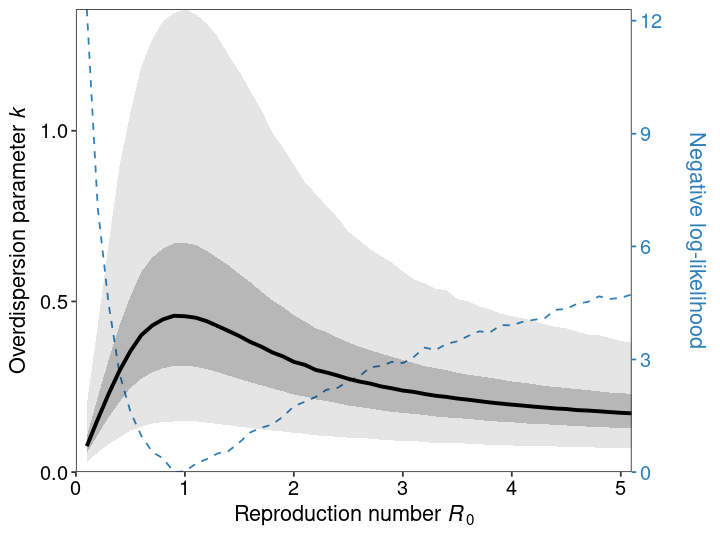

In [95]:
cs = c(6, 4.5)
options(repr.plot.width=cs[1], repr.plot.height=cs[2])

df_k$nllk = -(df_k$lp__-max(df_k$lp__))

ymx = max(df_k$k_upper)
ymx2 = max(df_k$nllk)
scaling_parameter = ymx2/ymx

clrs = c('black', '#2c7fb8')

df_k %>% 
    ggplot(aes(x=R0)) +
        geom_line(aes(y=nllk/scaling_parameter), color=clrs[2], size=.5, linetype='dashed') +

        geom_line(aes(y=k_median), color=clrs[1], size=1.1) +
        geom_ribbon(aes(ymax=k_IQR_upper, ymin=k_IQR_lower), fill=clrs[1], alpha = 0.2) +
        geom_ribbon(aes(ymax=k_upper, ymin=k_lower), fill=clrs[1], alpha = 0.1) +

        labs(x=expression("Reproduction number "*italic(R)[0]), y=expression("Overdispersion parameter "*italic(k))) +
        scale_y_continuous(sec.axis = sec_axis(~.*scaling_parameter, 
                                            name = "Negative log-likelihood\n")) +
        coord_cartesian(ylim=c(0,ymx), xlim=c(0,max(df_k$R0)), expand=0) +
        theme_bw() + 
        theme(text = element_text(size=13, family="sans", color="black"),
          axis.text = element_text(size=12, family="sans", color="black"),
          axis.text.y.right = element_text(color = clrs[2]), 
          axis.title.y.right = element_text(color=clrs[2]),
          axis.ticks.y.right = element_line(color = clrs[2]),
          panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
          legend.position = "none") -> pFinal

ggsave(plot=pFinal, width=cs[1], height=cs[2],
       filename="../../figures/AppendixFigure3.pdf",
       useDingbats=FALSE)

pFinal

## Wallinga-Teunis with GT

In [96]:
stan_code = "data {
    /* For Wallinga-Teunis matrix */
    int<lower = 1> K; // number of cases
    matrix<lower = 0>[K - 1, K] W;
    int<lower = 1> K_nonzero_total; // number of nonzero observed serial intervals 
    int<lower = 1, upper = K> nonzero_col_ind[K_nonzero_total]; // column indexes of W with non-zero elements
    int<lower = 0> nonzero_row_ind[K]; //row indexes of W for nonzero_col_ind

    int<lower = 1> Pi; // number of all combinations 

    real gt_par1;
    real<lower=0> gt_par2;

    // offspring distribution parameters
    //real<lower = 0> R0_par;
}

transformed data {
    int<lower = 1> K_nonzero[K-1]; // number of nonzero SIs by row
    for (j in 1:K-1)
        K_nonzero[j] = nonzero_row_ind[j+1] - nonzero_row_ind[j];
}

parameters {
    simplex[Pi] weight; // mixing proportions

    real<lower = 0> R0_par;
    real<lower = 0> k_par;
}

transformed parameters {
    matrix[K - 1, K] W_probs = rep_matrix(0.0, K-1, K);
    for (j in 1:K-1) {
        int i0 = nonzero_row_ind[j]+1;
        int i1 = nonzero_row_ind[j+1];
        if (i0==i1)
            W_probs[j, nonzero_col_ind[i0]] = 1.0;
        else {
            for (i_ in i0:i1) 
                W_probs[j, nonzero_col_ind[i_]] = lognormal_cdf(W[j, nonzero_col_ind[i_]] + 0.5 | gt_par1, gt_par2) - lognormal_cdf(W[j, nonzero_col_ind[i_]] - 0.5 | gt_par1, gt_par2);
            W_probs[j, 1:K] = W_probs[j, 1:K] / sum(W_probs[j, 1:K]);
        }
    }
}

model {
    R0_par ~ normal(2.4 * 1.3, 2.0);
    k_par ~ std_normal();

    vector[Pi] lps = log(weight);
    {
        int infector_for_j; //vector of infectors 
        int secondary_infections[K] = rep_array(0, K);
        for (k in 1:Pi) {
            int Pi0 = Pi;
            int k0 = 0;
            for (j in 1:K-1) {
                Pi0 /= K_nonzero[j];
                infector_for_j = nonzero_col_ind[nonzero_row_ind[j] + 1 + (k - k0) / Pi0];
                k0 += ((k - k0) / Pi0) * Pi0;
                lps[k] += log(W_probs[j, infector_for_j]);
                secondary_infections[infector_for_j] += 1;
            }
            lps[k] += neg_binomial_2_lpmf(secondary_infections | R0_par, k_par);
        }
    }
    target += log_sum_exp(lps);
}

generated quantities {
    int infector[K-1]; //vector of infectors 

    {
        vector[Pi] q;
        vector[Pi] lps = log(weight);
        int Pi0; int k0;
        for (k in 1:Pi) {
            Pi0 = Pi; k0 = 0;
            for (j in 1:K-1) {
                Pi0 /= K_nonzero[j];
                infector[j] = nonzero_col_ind[nonzero_row_ind[j] + 1 + (k - k0) / Pi0];
                k0 += ((k - k0) / Pi0) * Pi0;
                lps[k] += log(W_probs[j, infector[j]]);
            }
        }
        int comp = categorical_rng(exp(lps - log_sum_exp(lps)));
        Pi0 = Pi; k0 = 0;
        for (j in 1:K-1) {
            Pi0 /= K_nonzero[j];
            infector[j] = nonzero_col_ind[nonzero_row_ind[j] + 1 + (comp - k0) / Pi0];
            k0 += ((comp - k0) / Pi0) * Pi0;
        }
    }
}
"
stan_file = write_stan_file(stan_code)

In [97]:
data_list = list(# for Wallinga-Teunis matrix, 
                 K = ncol(W), 
                 K_nonzero_total = total_nonzero,
                 Pi = total_variants,
                 W = W,
                 nonzero_col_ind = W_nonzero,
                 nonzero_row_ind = W_nonzero_rows_ind,
                 gt_par1 = 1.54, gt_par2 = 0.37)
data_file = tempfile(fileext = ".json")
write_stan_json(data_list, data_file)

mod = cmdstan_model(stan_file)$sample(data = data_file,
                                      iter_sampling=2500, 
                                      iter_warmup=1000,
                                      refresh = 0,
                                      show_messages = FALSE,
                                      chains=4, 
                                      parallel_chains=4,
                                      seed=1)

Compiling Stan program...



Running MCMC with 4 parallel chains...

Chain 1 finished in 32.2 seconds.
Chain 4 finished in 32.1 seconds.
Chain 2 finished in 32.2 seconds.
Chain 3 finished in 32.5 seconds.

All 4 chains finished successfully.
Mean chain execution time: 32.3 seconds.
Total execution time: 32.6 seconds.


In [98]:
mod$summary(c("R0_par", "k_par"), ~quantile(.x, probs = c(0.5, 0.025, 0.975))) %>% as.data.frame

variable,50%,2.5%,97.5%
<chr>,<dbl>,<dbl>,<dbl>
R0_par,1.303,0.571,3.87
k_par,0.372,0.118,1.21


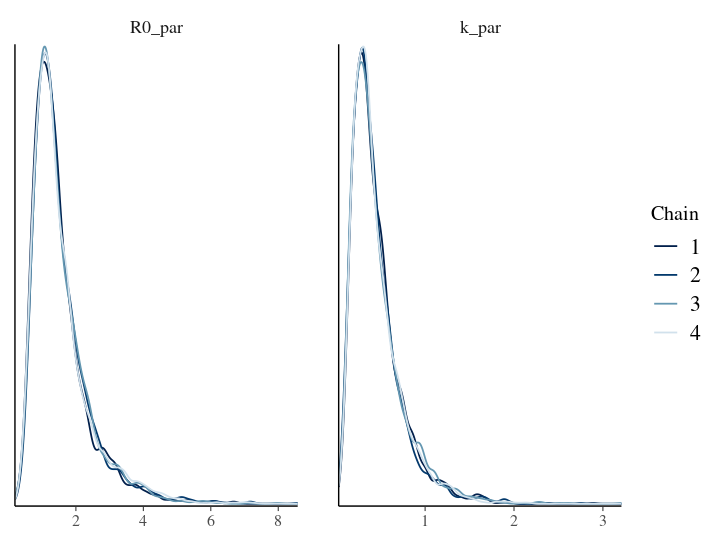

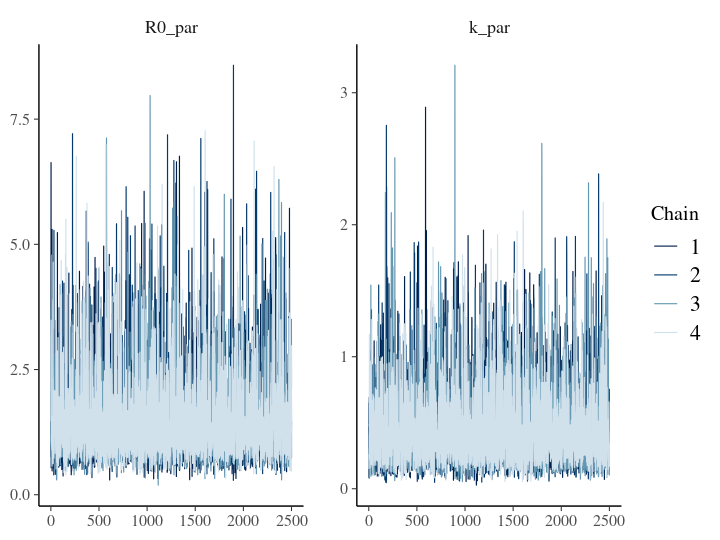

In [99]:
pars_ = c("R0_par", "k_par")
mcmc_dens_overlay(mod$draws(pars_), pars = pars_)
mcmc_trace(mod$draws(pars_), pars = pars_)

In [100]:
mod$save_output_files(dir = paste0(getwd(),"/stan_files"), 
                      basename = "gt_offspring_distribution", timestamp = FALSE, random = FALSE)

Moved 4 files and set internal paths to new locations:
- /home/aakhmetz/Dropbox/Taiwan_COVID 2021/scripts/Andrei/stan_files/gt_offspring_distribution-1.csv
- /home/aakhmetz/Dropbox/Taiwan_COVID 2021/scripts/Andrei/stan_files/gt_offspring_distribution-2.csv
- /home/aakhmetz/Dropbox/Taiwan_COVID 2021/scripts/Andrei/stan_files/gt_offspring_distribution-3.csv
- /home/aakhmetz/Dropbox/Taiwan_COVID 2021/scripts/Andrei/stan_files/gt_offspring_distribution-4.csv



# Final code: combining reporting delay, R, k, and end-of-outbreak

In [22]:
stan_code = "functions {    
    real positive_half_normal_rng(real mu, real sigma) {
      real y = -1;
      while (y < 0)
        y = normal_rng(mu, sigma);
      return y;
    }

    /* ODE for calculating the convolution f(s-tau)*h(tau) */
    vector convODE(real tau, vector y, real param1_SI, real param2_SI, real shift, real param1_delay, real param2_delay, int comp, real s) { 
        vector[1] dydt;
        // convolution of Weibull distribution with gamma
        if (comp==1)
            dydt[1] = exp(weibull_lpdf(s - tau | param1_SI, param2_SI) + gamma_lpdf(tau + shift | param1_delay, param2_delay));
        else if (comp==2)
            dydt[1] = exp(weibull_lpdf(s - tau | param1_SI, param2_SI) + weibull_lpdf(tau + shift | param1_delay, param2_delay));
        else
            dydt[1] = exp(weibull_lpdf(s - tau | param1_SI, param2_SI) + lognormal_lpdf(tau + shift | param1_delay, param2_delay));
        return dydt;
    }

    /* to calculate the convolution: integral(f(s-tau)*h(tau), tau=-shift..s) */
    vector convPDF(real s, vector y, real param1_SI, real param2_SI, real shift, real param1_delay, real param2_delay, int comp) {
        return(ode_rk45(convODE, rep_vector(0.0, 1), -shift, rep_array(s, 1), param1_SI, param2_SI, shift, param1_delay, param2_delay, comp, s)[1,]);
    }

    /* to calculate the cdf of the convolution: integral(integral(f(s-tau)*h(tau), tau=-shift..s), s = 0..t) */
    real convCDF(real t, real param1_SI, real param2_SI, real shift, real param1_delay, real param2_delay, int comp) {
        return(ode_rk45(convPDF, rep_vector(0.0, 1), -shift + 1e-8, rep_array(t, 1), param1_SI, param2_SI, shift, param1_delay, param2_delay, comp)[1,1]);
    }
}

data {
    /* For Wallinga-Teunis matrix */
    int<lower = 1> K; // number of cases
    matrix<lower = 0>[K - 1, K] W;
    int<lower = 1> K_nonzero_total; // number of nonzero observed serial intervals 
    int<lower = 1, upper = K> nonzero_col_ind[K_nonzero_total]; // column indexes of W with non-zero elements
    int<lower = 0> nonzero_row_ind[K]; //row indexes of W for nonzero_col_ind

    int<lower = 1> Pi; // number of all combinations 

    // serial interval parameters
    real mu_si_mean;
    real<lower = 0> sigma_si_mean;
    real mu_si_par1;
    real<lower = 0> sigma_si_par1;

    /* For reporting delay */
    int<lower = 1> N; // number of records
    int<lower = 0> onset_day[N];
    int<lower = 0> confirmation_day[N];

    int<lower = max(confirmation_day)> publication_time;

    /* For end of outbreak */
    int<lower = 1> D; // number days in the epicurve
    int day[D]; // vector of days in the epicurve
    int<lower = 0> cases[D]; // number of cases with onsets on that day 

    int<lower = 1> Y; // upper limit for the sum for y, in this case: y = {0, ..., Y-1}

}

transformed data {
    int<lower = 1> K_nonzero[K-1]; // number of nonzero SIs by row
    for (j in 1:K-1)
        K_nonzero[j] = nonzero_row_ind[j+1] - nonzero_row_ind[j];
}

parameters {
    /* For Wallinga-Teunis matrix */
    simplex[Pi] weight; // mixing proportions

    real<lower = 0> si_mean;
    real<lower = 0> si_par1;

    real<lower = 0> R0_par;
    real<lower = 0> k_par;

    /* For reporting delay */
    real<lower = 0> c; 
    vector<lower=0, upper=1>[N] onset_time_raw;
    vector<lower=0, upper=1>[N] confirmation_time_raw;

    real<lower = 0> sd_delay;
    real<lower = 0> param1_weibull;
    simplex[3] weight_; // mixing proportions
}

transformed parameters {
    /* For Wallinga-Teunis matrix */
    real<lower = 0> si_par2 = si_mean / tgamma(1.0 + 1.0 / si_par1);

    matrix[K - 1, K] W_probs = rep_matrix(0.0, K-1, K);
    for (j in 1:K-1) {
        int i0 = nonzero_row_ind[j]+1;
        int i1 = nonzero_row_ind[j+1];
        if (i0==i1)
            W_probs[j, nonzero_col_ind[i0]] = 1.0;
        else {
            for (i_ in i0:i1) 
                W_probs[j, nonzero_col_ind[i_]] = weibull_cdf(W[j, nonzero_col_ind[i_]] + 0.5 | si_par1, si_par2) - weibull_cdf(W[j, nonzero_col_ind[i_]] - 0.5 | si_par1, si_par2);
            W_probs[j, 1:K] = W_probs[j, 1:K] / sum(W_probs[j, 1:K]);
        }
    }

    /* For reporting delay */
    vector[N] onset_time = to_vector(onset_day) + onset_time_raw;
    vector[N] confirmation_time;
    for (i in 1:N)  
    if (confirmation_day[i] > onset_day[i]) 
        confirmation_time[i] = confirmation_day[i] + confirmation_time_raw[i];
    else
        confirmation_time[i] = onset_time[i] + (confirmation_day[i] + 1 - onset_time[i]) * confirmation_time_raw[i];

    real shift = c - min(confirmation_time - onset_time); // shift of the distribution

    vector[3] param1_delay;
    vector<lower = 0>[3] param2_delay;

    // Weibull distribution
    param1_delay[2] = param1_weibull;
    param2_delay[2] = sd_delay / sqrt(tgamma(1.0 + 2.0 / param1_delay[2]) - square(tgamma(1.0 + 1.0 / param1_delay[2])));
    real<lower = 0> mean_delay_not_shifted = param2_delay[2] * tgamma(1.0 + 1.0 / param1_delay[2]);    
    
    // Gamma distribution
    param1_delay[1] = square(mean_delay_not_shifted / sd_delay);
    param2_delay[1] = mean_delay_not_shifted / square(sd_delay);
    
    // Lognormal distribution
    param2_delay[3] = sqrt(log(square(sd_delay / mean_delay_not_shifted) + 1.0));
    param1_delay[3] = log(mean_delay_not_shifted) - square(param2_delay[3]) / 2.0;
}

model {
    /* For Wallinga-Teunis matrix */
    si_mean ~ normal(mu_si_mean, sigma_si_mean);
    si_par1 ~ normal(mu_si_par1, sigma_si_par1);

    R0_par ~ normal(2.4 * 1.3, 2.0);
    k_par ~ std_normal();

    vector[Pi] lps = log(weight);
    {
        int infector_for_j; //vector of infectors 
        int secondary_infections[K] = rep_array(0, K);
        for (k in 1:Pi) {
            int Pi0 = Pi;
            int k0 = 0;
            for (j in 1:K-1) {
                Pi0 /= K_nonzero[j];
                infector_for_j = nonzero_col_ind[nonzero_row_ind[j] + 1 + (k - k0) / Pi0];
                k0 += ((k - k0) / Pi0) * Pi0;
                lps[k] += log(W_probs[j, infector_for_j]);
                secondary_infections[infector_for_j] += 1;
            }
            lps[k] += neg_binomial_2_lpmf(secondary_infections | R0_par, k_par);
        }
    }
    target += log_sum_exp(lps);

    /* For reporting delay */
    sd_delay ~ cauchy(0.0, 5.0);
    param1_weibull ~ exponential(0.001);
    c ~ std_normal();

    vector[3] lps_ = log(weight_);
    lps_[1] += gamma_lpdf(confirmation_time - onset_time + shift | param1_delay[1], param2_delay[1]) 
                - gamma_lcdf(publication_time - onset_time + shift | param1_delay[1], param2_delay[1]); 
    lps_[2] += weibull_lpdf(confirmation_time - onset_time + shift | param1_delay[2], param2_delay[2]) 
                - weibull_lcdf(publication_time - onset_time + shift | param1_delay[2], param2_delay[2]); 
    lps_[3] += lognormal_lpdf(confirmation_time - onset_time + shift | param1_delay[3], param2_delay[3]) 
                - lognormal_lcdf(publication_time - onset_time + shift | param1_delay[3], param2_delay[3]); 
    target += log_sum_exp(lps_);
}

generated quantities {
    /* end-of-outbreak probability */
    real mean_delay = mean_delay_not_shifted - shift;

    real Pr[D]; // probability of extinction
    {
        vector[3] lps_ = log(weight_);
        lps_[1] += gamma_lpdf(confirmation_time - onset_time + shift | param1_delay[1], param2_delay[1]) - gamma_lcdf(publication_time - onset_time + shift | param1_delay[1], param2_delay[1]); 
        lps_[2] += weibull_lpdf(confirmation_time - onset_time + shift | param1_delay[2], param2_delay[2]) - weibull_lcdf(publication_time - onset_time + shift | param1_delay[2], param2_delay[2]); 
        lps_[3] += lognormal_lpdf(confirmation_time - onset_time + shift | param1_delay[3], param2_delay[3]) - lognormal_lcdf(publication_time - onset_time + shift | param1_delay[3], param2_delay[3]); 
        int comp = categorical_rng(exp(lps_ - log_sum_exp(lps_)));

        int M = 0;
        for (d in 1:D) 
            M += cases[d];
        
        // for our procedure below we need to have a vector of onset times not vector of incidence per day
        int onset[M];
        int kk = 0;
        for (d in 1:D) 
            for (case_ in 1:cases[d]) {
                kk += 1;
                onset[kk] = d;
            }
        int max_onset = max(onset);

        int Dmax = D - min(onset) + 1;
        vector[Dmax+1] conv_;
        for (t in 0:Dmax) 
            conv_[t+1] = convCDF(t + 0.5, si_par1, si_par2, shift, param1_delay[comp], param2_delay[comp], comp);
        // accounting for continuity factor
        vector[Dmax] conv = (conv_[2:(Dmax+1)] - conv_[1]) / (1.0 - conv_[1]); 

        vector[Y] y; // vector of indices
        vector[Y] log_py; // offspring distribution
        for (k in 1:Y) {
            y[k] = k - 1;
            log_py[k] = neg_binomial_2_lpmf(k - 1 | R0_par, k_par);
        }

        for (d in 1:D) {
            if (d <= max_onset + 1)
                Pr[d] = 1.0;
            else {
                real log_prodsum = 0.0;
                int idx; real cdf;
                for (i in 1:M) {
                    idx = d - onset[i];
                    cdf = conv[idx];
                    log_prodsum += log_sum_exp(log_py + y * log(cdf));
                }
                Pr[d] = 1.0 - exp(log_prodsum);
            }
        }
    }
}
"
stan_file = write_stan_file(stan_code)

In [37]:
getfit = function(df_delay_) {
    data_list = list(# for Wallinga-Teunis matrix, 
                 K = ncol(W), 
                 K_nonzero_total = total_nonzero,
                 Pi = total_variants,
                 W = W,
                 nonzero_col_ind = W_nonzero,
                 nonzero_row_ind = W_nonzero_rows_ind,
                 # SI parameters
                 mu_si_mean = 4.848, sigma_si_mean = 0.610,
                 mu_si_par1 = 2.305, sigma_si_par1 = 0.439,
                 # for reporting delay 
                 onset_day = df_delay_$onset_day,
                 confirmation_day = df_delay_$confirmation_day,
                 publication_time = publication_day,
                 N = nrow(df_delay_),
                 # for end-of-outbreak
                 D = nrow(df_epicurve), 
                 day = df_epicurve$day, 
                 cases = df_epicurve$cases,
                 Y = 1000, ### <- This parameter should be chosen carefully and be large enough!
                 Dmax = max(df_epicurve$day) + 1
    )
    data_file = tempfile(fileext = ".json")
    write_stan_json(data_list, data_file)

    init_list = list(mean_delay_not_shifted = 8.0, sd_delay = 6, c = 4.0, R0_par = 1.4, k0_par = 1.0, si_mean = 4.848, si_par1 = 2.305)
    init_file = tempfile(fileext = ".json")
    write_stan_json(init_list, init_file)
    cat(readLines(init_file), sep = "\n")

    mod = cmdstan_model(stan_file)$sample(data = data_file,
                                          iter_sampling=12500, 
                                          iter_warmup=2500,
                                          init = init_file,
                                          show_messages = FALSE,
                                          chains=4, 
                                          parallel_chains=4,
                                          seed=1)
    
    return(mod)
}

In [49]:
# change to TRUE if you want to re-run the simulations
recalc = FALSE
if (recalc) {
    fit_all = getfit(df_delay_all %>% filter(!is.na(Onset)))
    fit_all$save_output_files(dir = paste0(getwd(),"/stan_files"), basename = "fit_all", timestamp = FALSE, random = FALSE)
    fit_all$save_data_file(dir = paste0(getwd(),"/stan_files"), basename = "fit_all", timestamp = FALSE, random = FALSE)
} else {
    output_files = c()
    for (fl_ in list.files(paste0(getwd(),"/stan_files"), "*.csv", full.names = TRUE))
        if (grepl("fit_all-", fl_, fixed = TRUE))
            output_files = c(output_files, fl_)
    fit_all = as_cmdstan_fit(output_files)
}

In [50]:
fit_all$summary(c("R0_par", "k_par", "mean_delay", "sd_delay", "shift"), 
                ~quantile(.x, probs = c(0.5, 0.025, 0.975))) %>% as.data.frame

variable,50%,2.5%,97.5%
<chr>,<dbl>,<dbl>,<dbl>
R0_par,1.31,0.57,3.8
k_par,0.38,0.12,1.2
mean_delay,7.82,6.24,10.2
sd_delay,7.73,5.72,13.3
shift,0.78,0.11,2.1


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



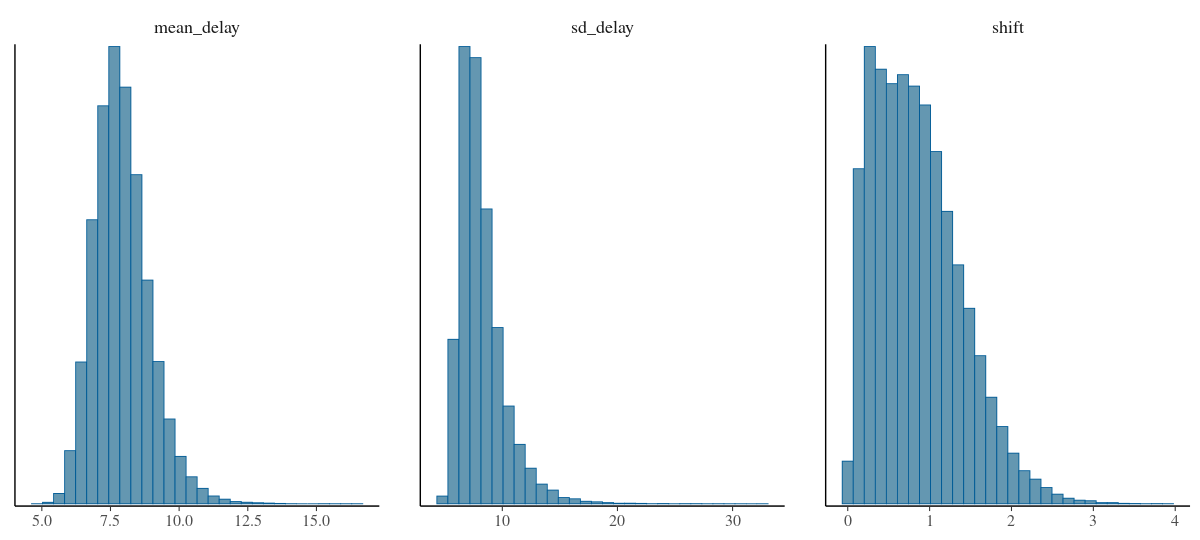

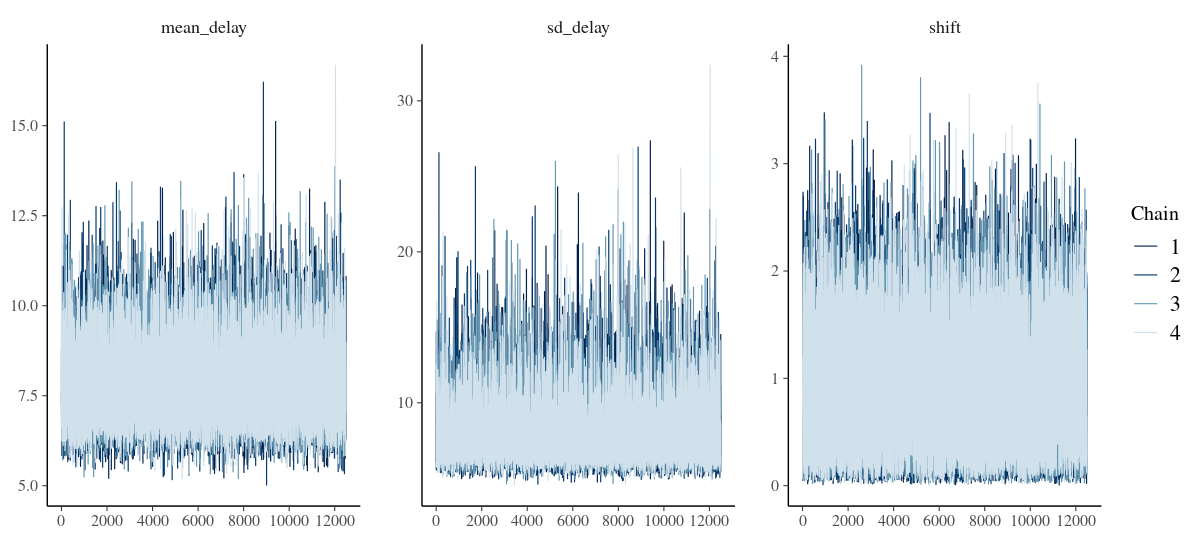

In [51]:
options(repr.plot.width=10, repr.plot.height=4.5)
mcmc_hist(fit_all$draws(c("mean_delay", "sd_delay", "shift")))
mcmc_trace(fit_all$draws(c("mean_delay", "sd_delay", "shift")))

In [52]:
recalc = FALSE
if (recalc) {
    fit_outbreak2021 = getfit(df_delay_all %>% filter(!is.na(Onset), Onset>=as.Date('2021-01-01')))
    fit_outbreak2021$save_output_files(dir = paste0(getwd(),"/stan_files"), basename = "fit_outbreak2021", timestamp = FALSE, random = FALSE)
    fit_outbreak2021$save_data_file(dir = paste0(getwd(),"/stan_files"), basename = "fit_outbreak2021", timestamp = FALSE, random = FALSE)
} else {
    output_files = c()
    for (fl_ in list.files(paste0(getwd(),"/stan_files"), "*.csv", full.names = TRUE))
        if (grepl("fit_outbreak2021-", fl_, fixed = TRUE))
            output_files = c(output_files, fl_)
    fit_outbreak2021 = as_cmdstan_fit(output_files)
}


This may indicate insufficient exploration of the posterior distribution.
Possible remedies include: 
  * Increasing adapt_delta closer to 1 (default is 0.8) 
  * Reparameterizing the model (e.g. using a non-centered parameterization)
  * Using informative or weakly informative prior distributions 




In [97]:
output_outbreak2021 = fit_outbreak2021$summary(c("R0_par", "k_par", "mean_delay", "sd_delay", "shift"), 
                     ~quantile(.x, probs = c(0.5, 0.025, 0.975))) %>% as.data.frame
names(output_outbreak2021) = c("variable", "median", "q2.5", "q97.5")
options(digits = 2)

output_outbreak2021

variable,median,q2.5,q97.5
<chr>,<dbl>,<dbl>,<dbl>
R0_par,1.30,0.57,3.8
k_par,0.38,0.12,1.2
mean_delay,2.51,1.81,3.4
sd_delay,1.60,1.12,2.9
shift,0.98,0.16,2.5


In [54]:
# End of outbreak
output_ = fit_all$summary(c("Pr"), ~quantile(.x, probs = c(0.5, 0.025, 0.975, 0.25, 0.75), na.rm=T)) %>% as.data.frame
names(output_) = c("variable", "Pr", "Pr_lower", "Pr_upper", "Pr_IQR_lower", "Pr_IQR_upper")
# # Here is some technical thing: to extract the number inside the brackets
# ## for example: Pr[1] will be separated on variable="Pr" and index=1
out = stringr::str_match_all(output_$variable, "[\\d+(.*)]")
output_$index = sapply(out, function(x) as.numeric(paste(x[,1],collapse="")))
output_ %>% 
  mutate(variable = stringr::str_extract(variable, "^[^\\[]+"), day = min(df_epicurve$day) + index - 1) %>%
  select(-index, -variable) %>% select(day, everything()) -> output_all
options(digits = 3)
output_all %>% tail

,day,Pr,Pr_lower,Pr_upper,Pr_IQR_lower,Pr_IQR_upper
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
86,85,0.0837,0.01122,0.446,0.0409,0.164
87,86,0.0770,0.00986,0.430,0.0370,0.154
88,87,0.0711,0.00881,0.414,0.0335,0.144
89,88,0.0655,0.00788,0.399,0.0305,0.136
90,89,0.0607,0.00716,0.383,0.0279,0.128
91,90,0.0564,0.00653,0.369,0.0256,0.120


In [55]:
output_ = fit_outbreak2021$summary(c("Pr"), ~quantile(.x, probs = c(0.5, 0.025, 0.975, 0.25, 0.75), na.rm=T)) %>% as.data.frame
names(output_) = c("variable", "Pr_outbreak2021", 
                   "Pr_outbreak2021_lower", "Pr_outbreak2021_upper", 
                   "Pr_outbreak2021_IQR_lower", "Pr_outbreak2021_IQR_upper")
out = stringr::str_match_all(output_$variable, "[\\d+(.*)]")
output_$index = sapply(out, function(x) as.numeric(paste(x[,1],collapse="")))
output_ %>% 
  mutate(variable = stringr::str_extract(variable, "^[^\\[]+"), day = min(df_epicurve$day) + index - 1) %>%
  select(-index, -variable) %>% select(day, everything()) -> output_outbreak2021
options(digits = 3)
output_outbreak2021 %>% tail

,day,Pr_outbreak2021,Pr_outbreak2021_lower,Pr_outbreak2021_upper,Pr_outbreak2021_IQR_lower,Pr_outbreak2021_IQR_upper
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
86,85,0.00122,-0.000550,0.0132,0.000505,0.00260
87,86,0.00116,-0.000580,0.0125,0.000478,0.00246
88,87,0.00111,-0.000614,0.0119,0.000451,0.00234
89,88,0.00107,-0.000638,0.0116,0.000430,0.00224
90,89,0.00104,-0.000660,0.0112,0.000410,0.00216
91,90,0.00101,-0.000689,0.0109,0.000395,0.00209


In [57]:
df_epicurve_confirmation %>% right_join(output_all, by='day') %>%
    right_join(output_outbreak2021, by='day') %>%
    filter(day >= 0) -> df_output 
df_output %>% tail

day,cases,Pr,Pr_lower,Pr_upper,Pr_IQR_lower,Pr_IQR_upper,Pr_outbreak2021,Pr_outbreak2021_lower,Pr_outbreak2021_upper,Pr_outbreak2021_IQR_lower,Pr_outbreak2021_IQR_upper
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
85,0,0.0837,0.01122,0.446,0.0409,0.164,0.00122,-0.000550,0.0132,0.000505,0.00260
86,0,0.0770,0.00986,0.430,0.0370,0.154,0.00116,-0.000580,0.0125,0.000478,0.00246
87,0,0.0711,0.00881,0.414,0.0335,0.144,0.00111,-0.000614,0.0119,0.000451,0.00234
88,0,0.0655,0.00788,0.399,0.0305,0.136,0.00107,-0.000638,0.0116,0.000430,0.00224
89,0,0.0607,0.00716,0.383,0.0279,0.128,0.00104,-0.000660,0.0112,0.000410,0.00216
90,0,0.0564,0.00653,0.369,0.0256,0.120,0.00101,-0.000689,0.0109,0.000395,0.00209


[1] 79.8

[1] 24.6

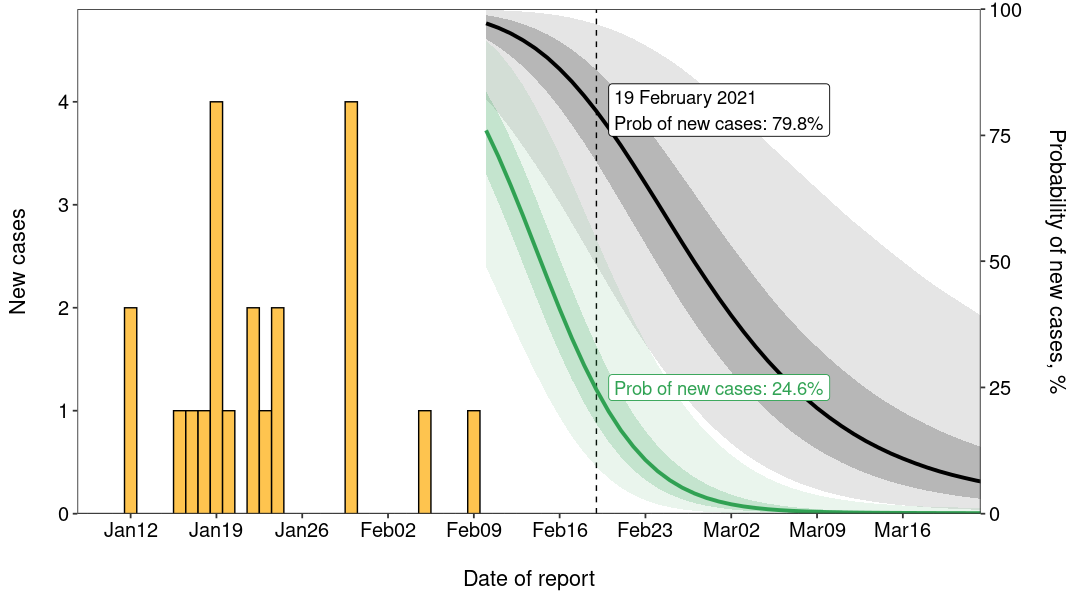

In [58]:
date_ref = as.Date('2021-02-19')
day_ref = as.numeric(date_ref - mindate_end_of_outbreak)

(prob_ref = df_output %>% filter(day == day_ref) %>% .$Pr*100)
(prob_outbreak2021_ref = df_output %>% filter(day == day_ref) %>% .$Pr_outbreak2021*100)

annotation = data.frame(x = rep(58,2), y = c(.8,.25), 
                        label = c(paste0(format(date_ref, "%d %B %Y"),
                                         "\nProb of new cases: ", round(prob_ref, digits=1), "%"),
                                  paste0("Prob of new cases: ", round(prob_outbreak2021_ref, digits=1), "%")),
                        color = c("black", "#31a354"))

ymx = max(df_epicurve_confirmation$cases+.9)
lastonset = max(df_epicurve[df_epicurve$cases > 0,]$day)
scaling_parameter = 1.0/ymx
options(repr.plot.width=9, repr.plot.height=5)

xtks = seq(12, 90, 7)
xtklbs = format(mindate_end_of_outbreak + xtks, "%b%d")

ytks = seq(0, 1, 0.25)
ytklbs = ytks*100

clrs = c("#fec44f", "#31a354", "black")

df_output %>% 
    filter(day >= lastonset + 3) %>%
    ggplot(aes(x=day)) +
        geom_bar(data = df_epicurve_confirmation, 
                 aes(y=cases), stat='identity', alpha=1, color="black", size=.4, width=1, 
                 fill=clrs[1]) +
        #geom_vline(xintercept=lastonset + 2, linetype="dotted", color = "black", size = 0.7) + 
        geom_vline(xintercept=day_ref, linetype="dashed", color = "black", size = 0.4) + 

        geom_line(aes(y=Pr/scaling_parameter), color=clrs[3], size=1.1) +
        geom_ribbon(aes(ymax=Pr_IQR_upper/scaling_parameter, ymin=Pr_IQR_lower/scaling_parameter), fill=clrs[3], alpha = 0.2) +
        geom_ribbon(aes(ymax=Pr_upper/scaling_parameter, ymin=Pr_lower/scaling_parameter), fill=clrs[3], alpha = 0.1) +

        geom_line(aes(y=Pr_outbreak2021/scaling_parameter), color=clrs[2], size=1.1) +
        geom_ribbon(aes(ymax=Pr_outbreak2021_IQR_upper/scaling_parameter, ymin=Pr_outbreak2021_IQR_lower/scaling_parameter), 
                    fill=clrs[2], alpha = 0.2) +
        geom_ribbon(aes(ymax=Pr_outbreak2021_upper/scaling_parameter, ymin=Pr_outbreak2021_lower/scaling_parameter), 
                    fill=clrs[2], alpha = 0.1) +

        labs(x="\nDate of report", y="New cases\n") +
        scale_x_continuous(breaks = xtks, labels = xtklbs) +
        scale_y_continuous(expand = c(0, 0),
                        sec.axis = sec_axis(~.*scaling_parameter, breaks = ytks, labels = ytklbs, 
                                            name = "Probability of new cases, %\n")) +
        geom_label(data=annotation, aes(x=x, y=y/scaling_parameter, label=label, color=color), hjust = 0) +
        scale_colour_manual(values=c(clrs[2], clrs[3])) + 
        coord_cartesian(ylim=c(0,ymx), xlim=c(18,85)) +
        theme_bw() + 
        theme(text = element_text(size=13, family="sans", color="black"),
          axis.text = element_text(size=12, family="sans", color="black"),
          panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
          legend.position = "none") -> pFinal

ggsave(plot=pFinal, width=8, height=4,
       filename="../../figures/Figure2.pdf",
       useDingbats=FALSE)

pFinal

In [59]:
(thr10_outbreak2021 = mindate_end_of_outbreak + df_output %>% filter(Pr_outbreak2021<.1) %>% head(1) %>% .$day)

[1] "2021-02-24"

In [60]:
(thr10_all = mindate_end_of_outbreak + df_output %>% filter(Pr<.1) %>% head(1) %>% .$day)

[1] "2021-03-17"

In [61]:
thr10_all - thr10_outbreak2021

Time difference of 21 days

# Sensitivity analysis

## 1. When the mean and CV of the delay distribution are fixed (Supplementary Figure 2)

In [103]:
stan_code1 = "functions {    
    real positive_half_normal_rng(real mu, real sigma) {
      real y = -1;
      while (y < 0)
        y = normal_rng(mu, sigma);
      return y;
    }

    /* ODE for calculating the convolution f(s-tau)*h(tau) */
    vector conv_ode(real tau, vector y, real param1_SI, real param2_SI, real shift, real param1_delay, real param2_delay, int comp, real s) { 
        vector[1] dydt;
        // convolution of Weibull distribution with gamma
        if (comp==1)
            dydt[1] = exp(weibull_lpdf(s - tau | param1_SI, param2_SI) + gamma_lpdf(tau + shift | param1_delay, param2_delay));
        else if (comp==2)
            dydt[1] = exp(weibull_lpdf(s - tau | param1_SI, param2_SI) + weibull_lpdf(tau + shift | param1_delay, param2_delay));
        else
            dydt[1] = exp(weibull_lpdf(s - tau | param1_SI, param2_SI) + lognormal_lpdf(tau + shift | param1_delay, param2_delay));
        return dydt;
    }

    /* to calculate the convolution: integral(f(s-tau)*h(tau), tau=-shift..s) */
    vector convPDF(real s, vector y, real param1_SI, real param2_SI, real shift, real param1_delay, real param2_delay, int comp) {
        return(ode_rk45(conv_ode, rep_vector(0.0, 1), -shift, rep_array(s, 1), param1_SI, param2_SI, shift, param1_delay, param2_delay, comp, s)[1,]);
    }

    /* to calculate the cdf of the convolution: integral(integral(f(s-tau)*h(tau), tau=-shift..s), s = 0..t) */
    real convCDF(real t, real param1_SI, real param2_SI, real shift, real param1_delay, real param2_delay, int comp) {
        return(ode_rk45(convPDF, rep_vector(0.0, 1), -shift + 1e-8, rep_array(t, 1), param1_SI, param2_SI, shift, param1_delay, param2_delay, comp)[1,1]);
    }
}

data {
    /* For Wallinga-Teunis matrix */
    int<lower = 1> K; // number of cases
    matrix<lower = 0>[K - 1, K] W;
    int<lower = 1> K_nonzero_total; // number of nonzero observed serial intervals 
    int<lower = 1, upper = K> nonzero_col_ind[K_nonzero_total]; // column indexes of W with non-zero elements
    int<lower = 0> nonzero_row_ind[K]; //row indexes of W for nonzero_col_ind

    int<lower = 1> Pi; // number of all combinations 

    /* For end of outbreak */
    int<lower = 1> D; // number days in the epicurve
    int day[D]; // vector of days in the epicurve
    int<lower = 0> cases[D]; // number of cases with onsets on that day 

    int<lower = 1> Y; // upper limit for the sum for y, in this case: y = {0, ..., Y-1}

    // serial interval parameters
    real mu_si_mean; 
    real<lower = 0> sigma_si_mean;
    real mu_si_par1;
    real<lower = 0> sigma_si_par1;

    // parameters of the delay distributions are fixed
    real<lower = 0> mean_delay;
    real<lower = 0> cv_delay;
    real<lower = 0> shift;
}

transformed data {
    real mean_delay_not_shifted = mean_delay + shift;
    real sd_delay = cv_delay * mean_delay_not_shifted;

    real param1_delay = square(mean_delay_not_shifted / sd_delay);
    real param2_delay = mean_delay_not_shifted / square(sd_delay);

    int<lower = 1> K_nonzero[K-1]; // number of nonzero SIs by row
    for (j in 1:K-1)
        K_nonzero[j] = nonzero_row_ind[j+1] - nonzero_row_ind[j];
}

parameters {
    /* For Wallinga-Teunis matrix */
    simplex[Pi] weight; // mixing proportions

    real<lower = 0> si_mean;
    real<lower = 0> si_par1;

    real<lower = 0> R0_par;
    real<lower = 0> k_par;
}

transformed parameters {
    /* For Wallinga-Teunis matrix */
    real<lower = 0> si_par2 = si_mean / tgamma(1.0 + 1.0 / si_par1);

    matrix[K - 1, K] W_probs = rep_matrix(0.0, K-1, K);
    for (j in 1:K-1) {
        int i0 = nonzero_row_ind[j]+1;
        int i1 = nonzero_row_ind[j+1];
        if (i0==i1)
            W_probs[j, nonzero_col_ind[i0]] = 1.0;
        else {
            for (i_ in i0:i1) 
                W_probs[j, nonzero_col_ind[i_]] = weibull_cdf(W[j, nonzero_col_ind[i_]] + 0.5 | si_par1, si_par2) - weibull_cdf(W[j, nonzero_col_ind[i_]] - 0.5 | si_par1, si_par2);
            W_probs[j, 1:K] = W_probs[j, 1:K] / sum(W_probs[j, 1:K]);
        }
    }
}

model {
    /* For Wallinga-Teunis matrix */
    si_mean ~ normal(mu_si_mean, sigma_si_mean);
    si_par1 ~ normal(mu_si_par1, sigma_si_par1);

    R0_par ~ normal(2.4 * 1.3, 2.0);
    k_par ~ std_normal();

    vector[Pi] lps = log(weight);
    {
        int infector_for_j; //vector of infectors 
        int secondary_infections[K] = rep_array(0, K);
        for (k in 1:Pi) {
            int Pi0 = Pi;
            int k0 = 0;
            for (j in 1:K-1) {
                Pi0 /= K_nonzero[j];
                infector_for_j = nonzero_col_ind[nonzero_row_ind[j] + 1 + (k - k0) / Pi0];
                k0 += ((k - k0) / Pi0) * Pi0;
                lps[k] += log(W_probs[j, infector_for_j]);
                secondary_infections[infector_for_j] += 1;
            }
            lps[k] += neg_binomial_2_lpmf(secondary_infections | R0_par, k_par);
        }
    }
    target += log_sum_exp(lps);
}

generated quantities {  
    real Pr[D]; // probability of extinction
    {
        int M = 0;
        for (d in 1:D) 
            M += cases[d];
        
        // for our procedure below we need to have a vector of onset times not vector of incidence per day
        int onset[M];
        int kk = 0;
        for (d in 1:D) 
            for (case_ in 1:cases[d]) {
                kk += 1;
                onset[kk] = d;
            }
        int max_onset = max(onset);
        
        int Dmax = D - min(onset) + 1;
        vector[Dmax+1] conv_;
        for (t in 0:Dmax) 
            conv_[t+1] = convCDF(t + 0.5, si_par1, si_par2, shift, param1_delay, param2_delay, 1); // gamma distribution
        // accounting for continuity factor
        vector[Dmax] conv = (conv_[2:(Dmax+1)] - conv_[1]) / (1.0 - conv_[1]); 

        vector[Y] y; // vector of indices
        vector[Y] log_py; // offspring distribution
        for (k in 1:Y) {
            y[k] = k - 1;
            log_py[k] = neg_binomial_2_lpmf(k - 1 | R0_par, k_par);
        }

        for (d in 1:D) {
            if (d <= max_onset + 1)
                Pr[d] = 1.0;
            else {
                real log_prodsum = 0.0;
                int idx; real cdf;
                for (i in 1:M) {
                    idx = d - onset[i];
                    cdf = conv[idx];
                    log_prodsum += log_sum_exp(log_py + y * log(cdf));
                }
                Pr[d] = 1.0 - exp(log_prodsum);
            }
        }
    }
}"
stan_file1 = write_stan_file(stan_code1)

In [104]:
getres_sens0 = function(mean_delay_, cv_delay_, shift_, fit_outbreak2021) {
    getfit_sens = function(df_delay_, mean_delay_, cv_delay_, shift_) {
        data_list = list(# for Wallinga-Teunis matrix, 
                         K = ncol(W), 
                         K_nonzero_total = total_nonzero,
                         Pi = total_variants,
                         W = W,
                         nonzero_col_ind = W_nonzero,
                         nonzero_row_ind = W_nonzero_rows_ind,
                         # reporting delay (fixed)
                         mean_delay = mean_delay_,
                         cv_delay = cv_delay_,
                         shift = shift_,
                         # for end-of-outbreak
                         D = nrow(df_epicurve), 
                         day = df_epicurve$day, 
                         cases = df_epicurve$cases,
                         Y = 1000, ### <- This parameter should be chosen carefully and be large enough!
                         Dmax = max(df_epicurve$day) + 1,
                         mu_si_mean = 4.848, sigma_si_mean = 0.610,
                         mu_si_par1 = 2.305, sigma_si_par1 = 0.439)
        data_file = tempfile(fileext = ".json")
        write_stan_json(data_list, data_file)
        
        init_list = list(R0_par = 1.4, k0_par = 1.0, si_mean = 4.848, si_par1 = 2.305)
        init_file = tempfile(fileext = ".json")
        write_stan_json(init_list, init_file)
        cat(readLines(init_file), sep = "\n")

        return(cmdstan_model(stan_file1)$sample(data = data_file, 
                                               init = init_file,
                                               iter_sampling=2500, 
                                               iter_warmup=2500,
                                               refresh=0, 
                                               show_messages=FALSE,
                                               chains=4, 
                                               parallel_chains=4,
                                               seed=1))
    }

    fit_all = getfit_sens(df_delay_all %>% filter(!is.na(Onset)), mean_delay_, cv_delay_, shift_)
    # End of outbreak
    output_ = fit_all$summary(c("Pr"), ~quantile(.x, probs = c(0.5, 0.025, 0.975, 0.25, 0.75), na.rm=T)) %>% as.data.frame
    names(output_) = c("variable", "Pr", "Pr_lower", "Pr_upper", "Pr_IQR_lower", "Pr_IQR_upper")
    # # Here is some technical thing: to extract the number inside the brackets
    # ## for example: Pr[1] will be separated on variable="Pr" and index=1
    out = stringr::str_match_all(output_$variable, "[\\d+(.*)]")
    output_$index = sapply(out, function(x) as.numeric(paste(x[,1],collapse="")))
    output_ %>% 
      mutate(variable = stringr::str_extract(variable, "^[^\\[]+"), day = min(df_epicurve$day) + index - 1) %>%
      select(-index, -variable) %>% select(day, everything()) -> output_all
                           
    output_ = fit_outbreak2021$summary(c("Pr"), ~quantile(.x, probs = c(0.5, 0.025, 0.975, 0.25, 0.75), na.rm=T)) %>% as.data.frame
    names(output_) = c("variable", "Pr_outbreak2021", 
                       "Pr_outbreak2021_lower", "Pr_outbreak2021_upper", 
                       "Pr_outbreak2021_IQR_lower", "Pr_outbreak2021_IQR_upper")
    out = stringr::str_match_all(output_$variable, "[\\d+(.*)]")
    output_$index = sapply(out, function(x) as.numeric(paste(x[,1],collapse="")))
    output_ %>% 
      mutate(variable = stringr::str_extract(variable, "^[^\\[]+"), day = min(df_epicurve$day) + index - 1) %>%
      select(-index, -variable) %>% select(day, everything()) -> output_outbreak2021                

    df_epicurve_confirmation %>% right_join(output_all) %>%
        right_join(output_outbreak2021) %>%
        filter(day >= 0) -> df_output
                           
    df_output['mean_delay'] = mean_delay_
    df_output['cv_delay'] = cv_delay_
    df_output['shift'] = shift_
                           
    return(df_output)
}

In [115]:
mean_delays = c(6.0, 10.0, 14.0)
cv_delays = c(0.2, 0.5, 0.8)
shift_ = 1.0

ind_ = TRUE
for (mean_delay_ in mean_delays)
    for (cv_delay_ in cv_delays) {
        message(paste0("mean_delay = ", mean_delay_, " days ; cv_delay = ", cv_delay_, "; shift = ", shift_, " day"))
        if (ind_) {
            df_sens0 = getres_sens0(mean_delay_, cv_delay_, shift_, fit_outbreak2021)
            ind_ = FALSE
        } else
            df_sens0 %<>% rbind(getres_sens0(mean_delay_, cv_delay_, shift_, fit_outbreak2021))
    }

mean_delay = 6 days ; cv_delay = 0.2; shift = 1 day



{
  "R0_par": 1.4,
  "k0_par": 1,
  "si_mean": 4.848,
  "si_par1": 2.305
}
Running MCMC with 4 parallel chains...

Chain 4 finished in 247.5 seconds.
Chain 1 finished in 256.5 seconds.
Chain 2 finished in 257.0 seconds.
Chain 3 finished in 258.1 seconds.

All 4 chains finished successfully.
Mean chain execution time: 254.8 seconds.
Total execution time: 258.4 seconds.


Joining, by = "day"

Joining, by = "day"

mean_delay = 6 days ; cv_delay = 0.5; shift = 1 day



{
  "R0_par": 1.4,
  "k0_par": 1,
  "si_mean": 4.848,
  "si_par1": 2.305
}
Running MCMC with 4 parallel chains...

Chain 4 finished in 193.3 seconds.
Chain 3 finished in 197.6 seconds.
Chain 1 finished in 198.3 seconds.
Chain 2 finished in 199.4 seconds.

All 4 chains finished successfully.
Mean chain execution time: 197.1 seconds.
Total execution time: 199.6 seconds.


Joining, by = "day"

Joining, by = "day"

mean_delay = 6 days ; cv_delay = 0.8; shift = 1 day



{
  "R0_par": 1.4,
  "k0_par": 1,
  "si_mean": 4.848,
  "si_par1": 2.305
}
Running MCMC with 4 parallel chains...

Chain 4 finished in 204.2 seconds.
Chain 3 finished in 208.6 seconds.
Chain 2 finished in 211.7 seconds.
Chain 1 finished in 213.5 seconds.

All 4 chains finished successfully.
Mean chain execution time: 209.5 seconds.
Total execution time: 213.6 seconds.


Joining, by = "day"

Joining, by = "day"

mean_delay = 10 days ; cv_delay = 0.2; shift = 1 day



{
  "R0_par": 1.4,
  "k0_par": 1,
  "si_mean": 4.848,
  "si_par1": 2.305
}
Running MCMC with 4 parallel chains...

Chain 4 finished in 275.2 seconds.
Chain 3 finished in 280.1 seconds.
Chain 1 finished in 284.3 seconds.
Chain 2 finished in 287.2 seconds.

All 4 chains finished successfully.
Mean chain execution time: 281.7 seconds.
Total execution time: 287.4 seconds.


Joining, by = "day"

Joining, by = "day"

mean_delay = 10 days ; cv_delay = 0.5; shift = 1 day



{
  "R0_par": 1.4,
  "k0_par": 1,
  "si_mean": 4.848,
  "si_par1": 2.305
}
Running MCMC with 4 parallel chains...

Chain 4 finished in 203.7 seconds.
Chain 3 finished in 206.7 seconds.
Chain 1 finished in 208.4 seconds.
Chain 2 finished in 209.9 seconds.

All 4 chains finished successfully.
Mean chain execution time: 207.1 seconds.
Total execution time: 210.0 seconds.


Joining, by = "day"

Joining, by = "day"

mean_delay = 10 days ; cv_delay = 0.8; shift = 1 day



{
  "R0_par": 1.4,
  "k0_par": 1,
  "si_mean": 4.848,
  "si_par1": 2.305
}
Running MCMC with 4 parallel chains...

Chain 4 finished in 219.5 seconds.
Chain 3 finished in 225.4 seconds.
Chain 1 finished in 226.1 seconds.
Chain 2 finished in 227.3 seconds.

All 4 chains finished successfully.
Mean chain execution time: 224.6 seconds.
Total execution time: 227.5 seconds.


Joining, by = "day"

Joining, by = "day"

mean_delay = 14 days ; cv_delay = 0.2; shift = 1 day



{
  "R0_par": 1.4,
  "k0_par": 1,
  "si_mean": 4.848,
  "si_par1": 2.305
}
Running MCMC with 4 parallel chains...

Chain 4 finished in 279.2 seconds.
Chain 3 finished in 285.6 seconds.
Chain 1 finished in 285.9 seconds.
Chain 2 finished in 290.3 seconds.

All 4 chains finished successfully.
Mean chain execution time: 285.3 seconds.
Total execution time: 290.5 seconds.


Joining, by = "day"

Joining, by = "day"

mean_delay = 14 days ; cv_delay = 0.5; shift = 1 day



{
  "R0_par": 1.4,
  "k0_par": 1,
  "si_mean": 4.848,
  "si_par1": 2.305
}
Running MCMC with 4 parallel chains...

Chain 4 finished in 206.7 seconds.
Chain 3 finished in 210.7 seconds.
Chain 1 finished in 212.2 seconds.
Chain 2 finished in 214.4 seconds.

All 4 chains finished successfully.
Mean chain execution time: 211.0 seconds.
Total execution time: 214.5 seconds.


Joining, by = "day"

Joining, by = "day"

mean_delay = 14 days ; cv_delay = 0.8; shift = 1 day



{
  "R0_par": 1.4,
  "k0_par": 1,
  "si_mean": 4.848,
  "si_par1": 2.305
}
Running MCMC with 4 parallel chains...

Chain 4 finished in 218.8 seconds.
Chain 1 finished in 225.7 seconds.
Chain 2 finished in 226.4 seconds.
Chain 3 finished in 227.1 seconds.

All 4 chains finished successfully.
Mean chain execution time: 224.5 seconds.
Total execution time: 227.2 seconds.


Joining, by = "day"

Joining, by = "day"



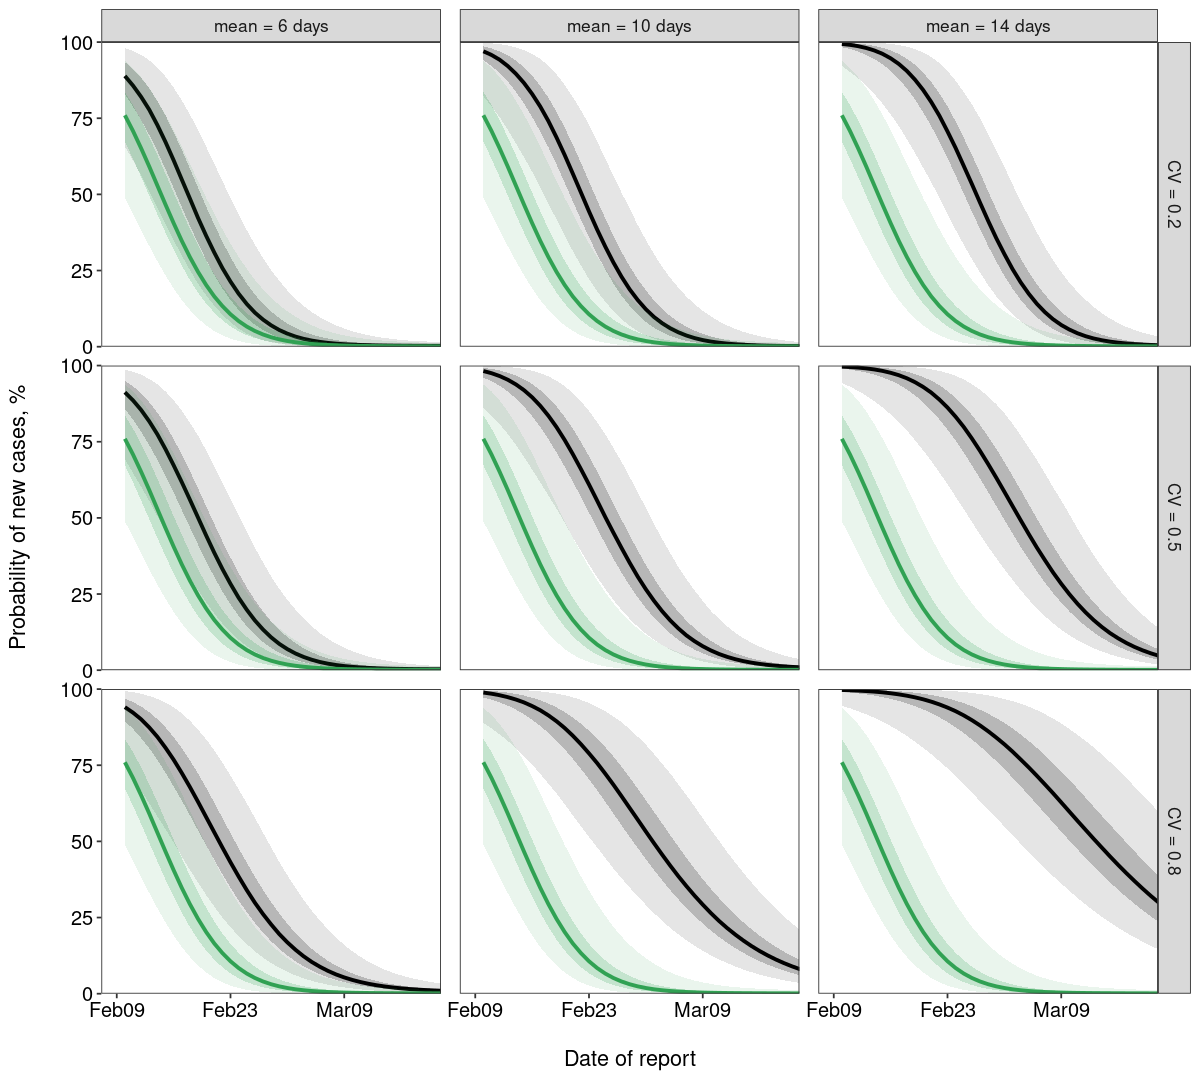

In [155]:
cs = c(10, 9)
options(repr.plot.width=cs[1], repr.plot.height=cs[2])

xtks = seq(lastonset+2, 90, 14)
xtklbs = format(mindate_end_of_outbreak + xtks, "%b%d")

ytks = seq(0, 1, 0.25)
ytklbs = ytks*100

clrs = c("#fec44f", "#31a354", "black")

mean_delay_labs =  glue('{sprintf("mean = %.0f days", mean_delays)}')
names(mean_delay_labs) = as.character(mean_delays)

cv_delay_labs =  glue('{sprintf("CV = %.1f", cv_delays)}')
names(cv_delay_labs) = as.character(cv_delays)

df_sens0 %>% 
    filter(day >= lastonset + 3) %>%
#     mutate(mean_delay = factor(mean_delay, levels=mean_delays)) %>%
    mutate(across(starts_with("Pr"), ~(.*100))) %>%
    ggplot(aes(x=day)) +
        geom_line(aes(y=Pr), color=clrs[3], size=1.1) +
        geom_ribbon(aes(ymax=Pr_IQR_upper, ymin=Pr_IQR_lower), fill=clrs[3], alpha = 0.2) +
        geom_ribbon(aes(ymax=Pr_upper, ymin=Pr_lower), fill=clrs[3], alpha = 0.1) +

        geom_line(aes(y=Pr_outbreak2021), color=clrs[2], size=1.1) +
        geom_ribbon(aes(ymax=Pr_outbreak2021_IQR_upper, ymin=Pr_outbreak2021_IQR_lower), 
                    fill=clrs[2], alpha = 0.2) +
        geom_ribbon(aes(ymax=Pr_outbreak2021_upper, ymin=Pr_outbreak2021_lower), 
                    fill=clrs[2], alpha = 0.1) +

        labs(x="\nDate of report", y="Probability of new cases, %\n") +
        scale_x_continuous(breaks = xtks, labels = xtklbs) +
        scale_y_continuous(expand = c(0, 0)) +
        scale_colour_manual(values=c(clrs[2], clrs[3])) + 
        coord_cartesian(ylim=c(0,100), xlim=c(lastonset+2,85)) +
        theme_bw() + 
        theme(text = element_text(size=13, family="sans", color="black"),
          axis.text = element_text(size=12, family="sans", color="black"),
          panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
          legend.position = "none", panel.spacing = unit(4, "mm")) +
    facet_grid(cv_delay ~  mean_delay, labeller = labeller(mean_delay = mean_delay_labs, cv_delay = cv_delay_labs)) -> pFinal

ggsave(plot=pFinal, width=cs[1], height=cs[2],
       filename="../../figures/AppendixFigure2.pdf",
       useDingbats=FALSE)

pFinal

## 2. When $R$ and $k$ are fixed (Supplementary Figure 1)

In [115]:
stan_code = "functions {    
    real positive_half_normal_rng(real mu, real sigma) {
      real y = -1;
      while (y < 0)
        y = normal_rng(mu, sigma);
      return y;
    }

    /* ODE for calculating the convolution f(s-tau)*h(tau) */
    vector conv_ode(real tau, vector y, real param1_SI, real param2_SI, real shift, real param1_delay, real param2_delay, int comp, real s) { 
        vector[1] dydt;
        // convolution of Weibull distribution with gamma
        if (comp==1)
            dydt[1] = exp(weibull_lpdf(s - tau | param1_SI, param2_SI) + gamma_lpdf(tau + shift | param1_delay, param2_delay));
        else if (comp==2)
            dydt[1] = exp(weibull_lpdf(s - tau | param1_SI, param2_SI) + weibull_lpdf(tau + shift | param1_delay, param2_delay));
        else
            dydt[1] = exp(weibull_lpdf(s - tau | param1_SI, param2_SI) + lognormal_lpdf(tau + shift | param1_delay, param2_delay));
        return dydt;
    }

    /* to calculate the convolution: integral(f(s-tau)*h(tau), tau=-shift..s) */
    vector conv_pdf(real s, vector y, real param1_SI, real param2_SI, real shift, real param1_delay, real param2_delay, int comp) {
        return(ode_rk45(conv_ode, rep_vector(0.0, 1), -shift, rep_array(s, 1), param1_SI, param2_SI, shift, param1_delay, param2_delay, comp, s)[1,]);
    }

    /* to calculate the cdf of the convolution: integral(integral(f(s-tau)*h(tau), tau=-shift..s), s = 0..t) */
    real conv_cdf(real t, real param1_SI, real param2_SI, real shift, real param1_delay, real param2_delay, int comp) {
        return(ode_rk45(conv_pdf, rep_vector(0.0, 1), -shift + 1e-8, rep_array(t, 1), param1_SI, param2_SI, shift, param1_delay, param2_delay, comp)[1,1]);
    }
}

data {
    /* For reporting delay */
    int<lower = 1> N; // number of records
    int<lower = 0> onset_day[N];
    int<lower = 0> confirmation_day[N];

    int<lower = max(confirmation_day)> publication_time;

    /* For end of outbreak */
    int<lower = 1> D; // number days in the epicurve
    int day[D]; // vector of days in the epicurve
    int<lower = 0> cases[D]; // number of cases with onsets on that day 

    int<lower = 1> Y; // upper limit for the sum for y, in this case: y = {0, ..., Y-1}

    // serial interval parameters
    real mu_si_mean; 
    real<lower = 0> sigma_si_mean;
    real mu_si_par1;
    real<lower = 0> sigma_si_par1;

    // offspring distribution parameters
    real<lower = 0> R0_par;
    real k_par;
}

parameters {
    real<lower = 0> c; 
    vector<lower=0, upper=1>[N] onset_time_raw;
    vector<lower=0, upper=1>[N] confirmation_time_raw;

    real<lower = 0> sd_delay;
    real<lower = 0> param1_weibull;
    simplex[3] weight; // mixing proportions
}

transformed parameters {
    vector[N] onset_time = to_vector(onset_day) + onset_time_raw;
    vector[N] confirmation_time;
    for (i in 1:N)  
    if (confirmation_day[i] > onset_day[i]) 
        confirmation_time[i] = confirmation_day[i] + confirmation_time_raw[i];
    else
        confirmation_time[i] = onset_time[i] + (confirmation_day[i] + 1 - onset_time[i]) * confirmation_time_raw[i];

    real shift = c - min(confirmation_time - onset_time); // shift of the distribution

    vector[3] param1_delay;
    vector<lower = 0>[3] param2_delay;

    // Weibull distribution
    param1_delay[2] = param1_weibull;
    param2_delay[2] = sd_delay / sqrt(tgamma(1.0 + 2.0 / param1_delay[2]) - square(tgamma(1.0 + 1.0 / param1_delay[2])));
    real<lower = 0> mean_delay_not_shifted = param2_delay[2] * tgamma(1.0 + 1.0 / param1_delay[2]);    
    
    // Gamma distribution
    param1_delay[1] = square(mean_delay_not_shifted / sd_delay);
    param2_delay[1] = mean_delay_not_shifted / square(sd_delay);
    
    // Lognormal distribution
    param2_delay[3] = sqrt(log(square(sd_delay / mean_delay_not_shifted) + 1.0));
    param1_delay[3] = log(mean_delay_not_shifted) - square(param2_delay[3]) / 2.0;

}

model {
    /* priors */
    sd_delay ~ cauchy(0.0, 5.0);
    param1_weibull ~ exponential(0.001);
    c ~ std_normal();

    vector[3] lps = log(weight);
    lps[1] += gamma_lpdf(confirmation_time - onset_time + shift | param1_delay[1], param2_delay[1]) - gamma_lcdf(publication_time - onset_time + shift | param1_delay[1], param2_delay[1]); 
    lps[2] += weibull_lpdf(confirmation_time - onset_time + shift | param1_delay[2], param2_delay[2]) - weibull_lcdf(publication_time - onset_time + shift | param1_delay[2], param2_delay[2]); 
    lps[3] += lognormal_lpdf(confirmation_time - onset_time + shift | param1_delay[3], param2_delay[3]) - lognormal_lcdf(publication_time - onset_time + shift | param1_delay[3], param2_delay[3]); 
    target += log_sum_exp(lps);
}

generated quantities {  
    real mean_delay = mean_delay_not_shifted - shift;

    vector<lower = 0, upper = 1>[3] q;
    real Pr[D]; // probability of extinction
    {
        vector[3] lps = log(weight);
        lps[1] += gamma_lpdf(confirmation_time - onset_time + shift | param1_delay[1], param2_delay[1]) - gamma_lcdf(publication_time - onset_time + shift | param1_delay[1], param2_delay[1]); 
        lps[2] += weibull_lpdf(confirmation_time - onset_time + shift | param1_delay[2], param2_delay[2]) - weibull_lcdf(publication_time - onset_time + shift | param1_delay[2], param2_delay[2]); 
        lps[3] += lognormal_lpdf(confirmation_time - onset_time + shift | param1_delay[3], param2_delay[3]) - lognormal_lcdf(publication_time - onset_time + shift | param1_delay[3], param2_delay[3]); 
        q = exp(lps - log_sum_exp(lps));

        int comp = categorical_rng(q);

        int M = 0;
        for (d in 1:D) 
            M += cases[d];
        
        // for our procedure below we need to have a vector of onset times not vector of incidence per day
        int onset[M];
        int kk = 0;
        for (d in 1:D) 
            for (case_ in 1:cases[d]) {
                kk += 1;
                onset[kk] = d;
            }
        int max_onset = max(onset);

        // serial interval parameters
        real si_mean = positive_half_normal_rng(mu_si_mean, sigma_si_mean);
        real si_par1 = positive_half_normal_rng(mu_si_par1, sigma_si_par1);
        real si_par2 = si_mean / tgamma(1.0 + 1.0 / si_par1);
        
        int Dmax = D - min(onset) + 1;
        vector[Dmax+1] conv_;
        for (t in 0:Dmax) 
            conv_[t+1] = conv_cdf(t + 0.5, si_par1, si_par2, shift, param1_delay[comp], param2_delay[comp], comp);
        // accounting for continuity factor
        vector[Dmax] conv = (conv_[2:(Dmax+1)] - conv_[1]) / (1.0 - conv_[1]); 

        vector[Y] y; // vector of indices
        vector[Y] log_py; // offspring distribution
        for (k in 1:Y) {
            y[k] = k - 1;
            log_py[k] = neg_binomial_2_lpmf(k - 1 | R0_par, k_par);
        }

        for (d in 1:D) {
            if (d <= max_onset + 1)
                Pr[d] = 1.0;
            else {
                real log_prodsum = 0.0;
                int idx; real cdf;
                for (i in 1:M) {
                    idx = d - onset[i];
                    cdf = conv[idx];
                    log_prodsum += log_sum_exp(log_py + y * log(cdf));
                }
                Pr[d] = 1.0 - exp(log_prodsum);
            }
        }
    }
}"
stan_file = write_stan_file(stan_code)

In [116]:
getres_sens = function(R0_, k_) {
    getfit_sens = function(df_delay_, R0_, k_) {
        data_list = list(# for reporting delay, 
                         onset_day = df_delay_$onset_day, 
                         confirmation_day = df_delay_$confirmation_day,
                         publication_time = publication_day,
                         N = nrow(df_delay_),
                         # for end-of-outbreak
                         D = nrow(df_epicurve), 
                         day = df_epicurve$day, 
                         cases = df_epicurve$cases,
                         Y = 1000, ### <- This parameter should be chosen carefully and be large enough!
                         Dmax = max(df_epicurve$day) + 1,
                         R0_par = R0_, k_par = k_,
                         mu_si_mean = 4.848, sigma_si_mean = 0.610,
                         mu_si_par1 = 2.305, sigma_si_par1 = 0.439)
        data_file = tempfile(fileext = ".json")
        write_stan_json(data_list, data_file)

        init_list = list(mean_delay_not_shifted = 7.0, sd_delay = 3, c = 2.0)
        init_file = tempfile(fileext = ".json")
        write_stan_json(init_list, init_file)

        return(cmdstan_model(stan_file)$sample(data = data_file,
                                               init = init_file,
                                               iter_sampling=12500, 
                                               iter_warmup=2500,
                                               adapt_delta=0.95,
                                               refresh=0, 
                                               show_messages=FALSE,
                                               chains=4, 
                                               parallel_chains=4,
                                               seed=1))
    }

    fit_all = getfit_sens(df_delay_all %>% filter(!is.na(Onset)), R0_, k_)
    fit_outbreak2021 = getfit_sens(df_delay_all %>% filter(!is.na(Onset), Onset>=as.Date('2021-01-01')), R0_, k_)    
    
    # End of outbreak
    output_ = fit_all$summary(c("Pr"), ~quantile(.x, probs = c(0.5, 0.025, 0.975, 0.25, 0.75), na.rm=T)) %>% as.data.frame
    names(output_) = c("variable", "Pr", "Pr_lower", "Pr_upper", "Pr_IQR_lower", "Pr_IQR_upper")
    # # Here is some technical thing: to extract the number inside the brackets
    # ## for example: Pr[1] will be separated on variable="Pr" and index=1
    out = stringr::str_match_all(output_$variable, "[\\d+(.*)]")
    output_$index = sapply(out, function(x) as.numeric(paste(x[,1],collapse="")))
    output_ %>% 
      mutate(variable = stringr::str_extract(variable, "^[^\\[]+"), day = min(df_epicurve$day) + index - 1) %>%
      select(-index, -variable) %>% select(day, everything()) -> output_all

    output_ = fit_outbreak2021$summary(c("Pr"), ~quantile(.x, probs = c(0.5, 0.025, 0.975, 0.25, 0.75), na.rm=T)) %>% as.data.frame
    names(output_) = c("variable", "Pr_outbreak2021", 
                       "Pr_outbreak2021_lower", "Pr_outbreak2021_upper", 
                       "Pr_outbreak2021_IQR_lower", "Pr_outbreak2021_IQR_upper")
    out = stringr::str_match_all(output_$variable, "[\\d+(.*)]")
    output_$index = sapply(out, function(x) as.numeric(paste(x[,1],collapse="")))
    output_ %>% 
      mutate(variable = stringr::str_extract(variable, "^[^\\[]+"), day = min(df_epicurve$day) + index - 1) %>%
      select(-index, -variable) %>% select(day, everything()) -> output_outbreak2021
                           
    df_epicurve_confirmation %>% right_join(output_all) %>%
        right_join(output_outbreak2021) %>%
        filter(day >= 0) -> df_output
                           
    df_output['R0_par'] = R0_
    df_output['k_par'] = k_
                           
    return(df_output)
}

In [117]:
R0s = c(0.7, 1.2, 2.5)
ks = c(0.11, 0.27, 19.2)

ind_ = TRUE
for (R0_ in R0s)
    for (k_ in ks) {
        message(paste0("R0 = ", R0_, "; k = ", k_))
        if (ind_) {
            df_sens = getres_sens(R0_, k_)
            ind_ = FALSE
        } else
            df_sens %<>% rbind(getres_sens(R0_, k_))
    }

R0 = 0.7; k = 0.11

Compiling Stan program...



Running MCMC with 4 parallel chains...

Chain 2 finished in 799.4 seconds.
Chain 4 finished in 802.2 seconds.
Chain 1 finished in 803.1 seconds.
Chain 3 finished in 834.2 seconds.

All 4 chains finished successfully.
Mean chain execution time: 809.7 seconds.
Total execution time: 834.3 seconds.


Model executable is up to date!



Running MCMC with 4 parallel chains...

Chain 1 finished in 712.9 seconds.
Chain 4 finished in 712.8 seconds.
Chain 2 finished in 715.7 seconds.
Chain 3 finished in 716.5 seconds.

All 4 chains finished successfully.
Mean chain execution time: 714.5 seconds.
Total execution time: 716.7 seconds.


Joining, by = "day"

Joining, by = "day"

R0 = 0.7; k = 0.27

Model executable is up to date!



Running MCMC with 4 parallel chains...

Chain 1 finished in 791.7 seconds.
Chain 2 finished in 791.7 seconds.
Chain 4 finished in 796.3 seconds.
Chain 3 finished in 828.9 seconds.

All 4 chains finished successfully.
Mean chain execution time: 802.2 seconds.
Total execution time: 829.0 seconds.


Model executable is up to date!



Running MCMC with 4 parallel chains...

Chain 1 finished in 714.5 seconds.
Chain 3 finished in 716.9 seconds.
Chain 2 finished in 717.6 seconds.
Chain 4 finished in 718.4 seconds.

All 4 chains finished successfully.
Mean chain execution time: 716.9 seconds.
Total execution time: 718.5 seconds.


Joining, by = "day"

Joining, by = "day"

R0 = 0.7; k = 19.2

Model executable is up to date!



Running MCMC with 4 parallel chains...

Chain 1 finished in 797.1 seconds.
Chain 2 finished in 798.8 seconds.
Chain 4 finished in 799.9 seconds.
Chain 3 finished in 836.2 seconds.

All 4 chains finished successfully.
Mean chain execution time: 808.0 seconds.
Total execution time: 836.3 seconds.


Model executable is up to date!



Running MCMC with 4 parallel chains...

Chain 4 finished in 721.3 seconds.
Chain 2 finished in 723.8 seconds.
Chain 3 finished in 724.7 seconds.
Chain 1 finished in 727.3 seconds.

All 4 chains finished successfully.
Mean chain execution time: 724.3 seconds.
Total execution time: 727.4 seconds.


Joining, by = "day"

Joining, by = "day"

R0 = 1.2; k = 0.11

Model executable is up to date!



Running MCMC with 4 parallel chains...

Chain 1 finished in 795.4 seconds.
Chain 2 finished in 796.3 seconds.
Chain 4 finished in 800.3 seconds.
Chain 3 finished in 833.7 seconds.

All 4 chains finished successfully.
Mean chain execution time: 806.4 seconds.
Total execution time: 833.8 seconds.


Model executable is up to date!



Running MCMC with 4 parallel chains...

Chain 4 finished in 717.4 seconds.
Chain 3 finished in 720.1 seconds.
Chain 1 finished in 720.6 seconds.
Chain 2 finished in 721.0 seconds.

All 4 chains finished successfully.
Mean chain execution time: 719.8 seconds.
Total execution time: 721.1 seconds.


Joining, by = "day"

Joining, by = "day"

R0 = 1.2; k = 0.27

Model executable is up to date!



Running MCMC with 4 parallel chains...

Chain 2 finished in 797.1 seconds.
Chain 1 finished in 797.3 seconds.
Chain 4 finished in 799.4 seconds.
Chain 3 finished in 833.2 seconds.

All 4 chains finished successfully.
Mean chain execution time: 806.8 seconds.
Total execution time: 833.3 seconds.


Model executable is up to date!



Running MCMC with 4 parallel chains...

Chain 4 finished in 718.5 seconds.
Chain 2 finished in 719.2 seconds.
Chain 3 finished in 719.9 seconds.
Chain 1 finished in 721.4 seconds.

All 4 chains finished successfully.
Mean chain execution time: 719.8 seconds.
Total execution time: 721.5 seconds.


Joining, by = "day"

Joining, by = "day"

R0 = 1.2; k = 19.2

Model executable is up to date!



Running MCMC with 4 parallel chains...

Chain 1 finished in 787.4 seconds.
Chain 2 finished in 791.6 seconds.
Chain 4 finished in 793.9 seconds.
Chain 3 finished in 824.5 seconds.

All 4 chains finished successfully.
Mean chain execution time: 799.4 seconds.
Total execution time: 824.6 seconds.


Model executable is up to date!



Running MCMC with 4 parallel chains...

Chain 4 finished in 713.0 seconds.
Chain 1 finished in 713.7 seconds.
Chain 2 finished in 715.6 seconds.
Chain 3 finished in 717.1 seconds.

All 4 chains finished successfully.
Mean chain execution time: 714.8 seconds.
Total execution time: 717.2 seconds.


Joining, by = "day"

Joining, by = "day"

R0 = 2.5; k = 0.11

Model executable is up to date!



Running MCMC with 4 parallel chains...

Chain 1 finished in 785.9 seconds.
Chain 4 finished in 793.2 seconds.
Chain 2 finished in 804.4 seconds.
Chain 3 finished in 825.9 seconds.

All 4 chains finished successfully.
Mean chain execution time: 802.4 seconds.
Total execution time: 826.1 seconds.


Model executable is up to date!



Running MCMC with 4 parallel chains...

Chain 2 finished in 710.9 seconds.
Chain 4 finished in 711.6 seconds.
Chain 3 finished in 712.3 seconds.
Chain 1 finished in 718.6 seconds.

All 4 chains finished successfully.
Mean chain execution time: 713.4 seconds.
Total execution time: 718.7 seconds.


Joining, by = "day"

Joining, by = "day"

R0 = 2.5; k = 0.27

Model executable is up to date!



Running MCMC with 4 parallel chains...

Chain 2 finished in 792.2 seconds.
Chain 1 finished in 792.4 seconds.
Chain 4 finished in 792.5 seconds.
Chain 3 finished in 826.9 seconds.

All 4 chains finished successfully.
Mean chain execution time: 801.0 seconds.
Total execution time: 827.0 seconds.


Model executable is up to date!



Running MCMC with 4 parallel chains...

Chain 1 finished in 711.4 seconds.
Chain 2 finished in 713.2 seconds.
Chain 4 finished in 713.1 seconds.
Chain 3 finished in 717.0 seconds.

All 4 chains finished successfully.
Mean chain execution time: 713.7 seconds.
Total execution time: 717.2 seconds.


Joining, by = "day"

Joining, by = "day"

R0 = 2.5; k = 19.2

Model executable is up to date!



Running MCMC with 4 parallel chains...

Chain 1 finished in 790.2 seconds.
Chain 4 finished in 792.3 seconds.
Chain 2 finished in 802.0 seconds.
Chain 3 finished in 826.7 seconds.

All 4 chains finished successfully.
Mean chain execution time: 802.8 seconds.
Total execution time: 826.9 seconds.


Model executable is up to date!



Running MCMC with 4 parallel chains...

Chain 1 finished in 711.9 seconds.
Chain 4 finished in 715.0 seconds.
Chain 2 finished in 717.2 seconds.
Chain 3 finished in 718.6 seconds.

All 4 chains finished successfully.
Mean chain execution time: 715.7 seconds.
Total execution time: 718.6 seconds.


Joining, by = "day"

Joining, by = "day"



In [118]:
# df_sens %>% write.csv("sensitivity_analysis.csv", row.names=FALSE)

In [119]:
df_sens %>% head(2)

day,cases,Pr,Pr_lower,Pr_upper,Pr_IQR_lower,Pr_IQR_upper,Pr_outbreak2021,Pr_outbreak2021_lower,Pr_outbreak2021_upper,Pr_outbreak2021_IQR_lower,Pr_outbreak2021_IQR_upper,R0_par,k_par
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,0,1,1,1,1,1,1,1,1,1,1,0.7,0.11
1,0,1,1,1,1,1,1,1,1,1,1,0.7,0.11


In [120]:
lastonset

[1] 45

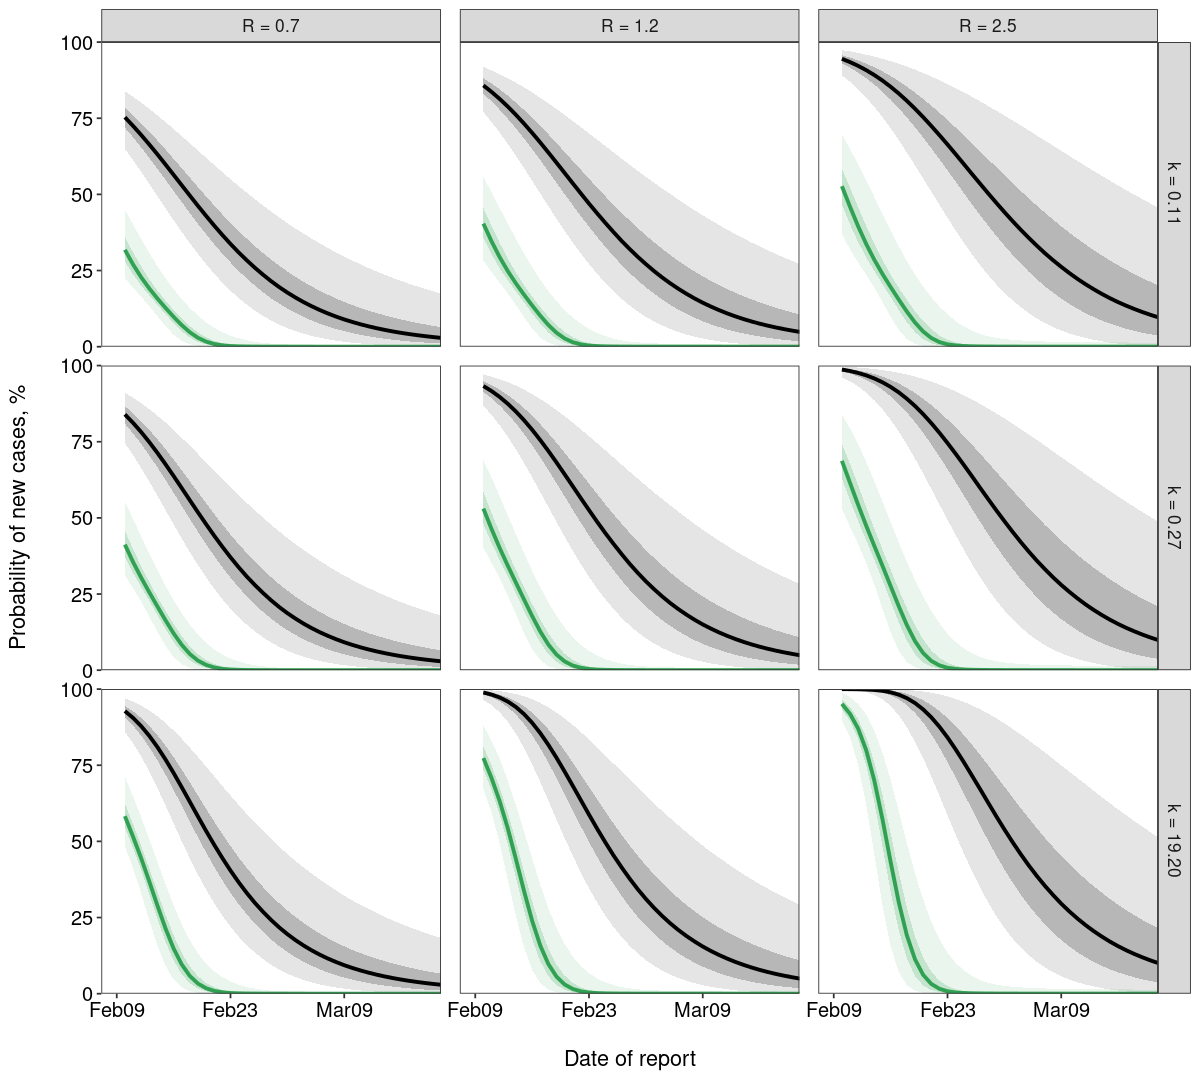

In [122]:
cs = c(10, 9)
options(repr.plot.width=cs[1], repr.plot.height=cs[2])

xtks = seq(lastonset+2, 90, 14)
xtklbs = format(mindate_end_of_outbreak + xtks, "%b%d")

ytks = seq(0, 1, 0.25)
ytklbs = ytks*100

clrs = c("#fec44f", "#31a354", "black")

df_sens %>% 
    filter(day >= lastonset + 3) %>%
    mutate(across(starts_with("Pr"), ~(.*100)),
           R0_par = glue('{sprintf("R = %.1f", R0_par)}'), k_par = glue('{sprintf("k = %.2f", k_par)}')) %>%
    ggplot(aes(x=day)) +
        geom_line(aes(y=Pr), color=clrs[3], size=1.1) +
        geom_ribbon(aes(ymax=Pr_IQR_upper, ymin=Pr_IQR_lower), fill=clrs[3], alpha = 0.2) +
        geom_ribbon(aes(ymax=Pr_upper, ymin=Pr_lower), fill=clrs[3], alpha = 0.1) +

        geom_line(aes(y=Pr_outbreak2021), color=clrs[2], size=1.1) +
        geom_ribbon(aes(ymax=Pr_outbreak2021_IQR_upper, ymin=Pr_outbreak2021_IQR_lower), 
                    fill=clrs[2], alpha = 0.2) +
        geom_ribbon(aes(ymax=Pr_outbreak2021_upper, ymin=Pr_outbreak2021_lower), 
                    fill=clrs[2], alpha = 0.1) +

        labs(x="\nDate of report", y="Probability of new cases, %\n") +
        scale_x_continuous(breaks = xtks, labels = xtklbs) +
        scale_y_continuous(expand = c(0, 0)) +
        scale_colour_manual(values=c(clrs[2], clrs[3])) + 
        coord_cartesian(ylim=c(0,100), xlim=c(lastonset+2,85)) +
        theme_bw() + 
        theme(text = element_text(size=13, family="sans", color="black"),
          axis.text = element_text(size=12, family="sans", color="black"),
          panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
          legend.position = "none", panel.spacing = unit(4, "mm")) +
    facet_grid(k_par ~  R0_par) -> pFinal

ggsave(plot=pFinal, width=cs[1], height=cs[2],
       filename="../../figures/AppendixFigure1.pdf",
       useDingbats=FALSE)

pFinal